
 **เรื่อง วิเคราะห์ข้อมูลการติดเชื้อ HIV**

**กลุ่มที่ 13**


**สมาชิก \
นายกิระวัฒน์ คำใจ\
นายณภัทร์ อนันตริยะทรัพย์**

## ***DATA PROJECT***

In [ ]:
!gdown --id 1D2f4Q6Vx1bQUkR5zhbQpMRf4BX8cbE9z
!unzip hivdata.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1D2f4Q6Vx1bQUkR5zhbQpMRf4BX8cbE9z
To: /content/hivdata.zip
100% 38.0k/38.0k [00:00<00:00, 49.0MB/s]
Archive:  hivdata.zip
  inflating: art_coverage_by_country_clean.csv  
  inflating: art_pediatric_coverage_by_country_clean.csv  
  inflating: no_of_cases_adults_15_to_49_by_country_clean.csv  
  inflating: no_of_deaths_by_country_clean.csv  
  inflating: no_of_people_living_with_hiv_by_country_clean.csv  
  inflating: prevention_of_mother_to_child_transmission_by_country_clean.csv  


In [ ]:
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import requests
import plotly.express as px
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [ ]:
cases =pd.read_csv('no_of_cases_adults_15_to_49_by_country_clean.csv')
country_death = pd.read_csv('no_of_deaths_by_country_clean.csv')
living = pd.read_csv('no_of_people_living_with_hiv_by_country_clean.csv')
coverage = pd.read_csv("art_coverage_by_country_clean.csv")
pediatric = pd.read_csv("art_pediatric_coverage_by_country_clean.csv")
prevention = pd.read_csv("prevention_of_mother_to_child_transmission_by_country_clean.csv")


In [ ]:
cases.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3,Africa
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4,Americas


In [ ]:
country_death.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,500[200–610],500.0,200.0,610.0,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,200[200–200],200.0,200.0,200.0,Africa
3,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa
4,Argentina,2018,1700[1300–2100],1700.0,1300.0,2100.0,Americas


In [ ]:
living.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,7200[4100–11000],7200.0,4100.0,11000.0,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,16000[15000–17000],16000.0,15000.0,17000.0,Africa
3,Angola,2018,330000[290000–390000],330000.0,290000.0,390000.0,Africa
4,Argentina,2018,140000[130000–150000],140000.0,130000.0,150000.0,Americas


In [ ]:
coverage.head()

,Country,Reported number of people receiving ART,Estimated number of people living with HIV,Estimated ART coverage among people living with HIV (%),Estimated number of people living with HIV_median,Estimated number of people living with HIV_min,Estimated number of people living with HIV_max,Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max,WHO Region
0,Afghanistan,920,7200[4100–11000],13[7–20],7200.0,4100.0,11000.0,13.0,7.0,20.0,Eastern Mediterranean
1,Albania,580,Nodata,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,12800,16000[15000–17000],81[75–86],16000.0,15000.0,17000.0,81.0,75.0,86.0,Africa
3,Angola,88700,330000[290000–390000],27[23–31],330000.0,290000.0,390000.0,27.0,23.0,31.0,Africa
4,Argentina,85500,140000[130000–150000],61[55–67],140000.0,130000.0,150000.0,61.0,55.0,67.0,Americas


In [ ]:
pediatric.head()

,Country,Reported number of children receiving ART,Estimated number of children needing ART based on WHO methods,Estimated ART coverage among children (%),Estimated number of children needing ART based on WHO methods_median,Estimated number of children needing ART based on WHO methods_min,Estimated number of children needing ART based on WHO methods_max,Estimated ART coverage among children (%)_median,Estimated ART coverage among children (%)_min,Estimated ART coverage among children (%)_max,WHO Region
0,Afghanistan,60,500[500-530],17[10-26],500.0,500.0,530.0,17.0,10.0,26.0,Eastern Mediterranean
1,Albania,20,Nodata,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,770,500[500-520],95[95-95],500.0,500.0,520.0,95.0,95.0,95.0,Africa
3,Angola,4800,38000[30000-47000],13[10-16],38000.0,30000.0,47000.0,13.0,10.0,16.0,Africa
4,Argentina,1700,1800[1600-2100],92[84-95],1800.0,1600.0,2100.0,92.0,84.0,95.0,Americas


In [ ]:
prevention.head()

,Country,Received Antiretrovirals,Needing antiretrovirals,Percentage Recieved,Needing antiretrovirals_median,Needing antiretrovirals_min,Needing antiretrovirals_max,Percentage Recieved_median,Percentage Recieved_min,Percentage Recieved_max,WHO Region
0,Afghanistan,20,200[100–500],11[7–18],200.0,100.0,500.0,11.0,7.0,18.0,Eastern Mediterranean
1,Albania,No data,Nodata,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,320,500[500–500],74[69–78],500.0,500.0,500.0,74.0,69.0,78.0,Africa
3,Angola,9600,25000[19000–32000],38[29–48],25000.0,19000.0,32000.0,38.0,29.0,48.0,Africa
4,Argentina,1800,1800[1600–2000],95[85–95],1800.0,1600.0,2000.0,95.0,85.0,95.0,Americas


# ***ข้อมูลการเสียชีวิต***

---



In [ ]:
country_death.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,500[200–610],500.0,200.0,610.0,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,200[200–200],200.0,200.0,200.0,Africa
3,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa
4,Argentina,2018,1700[1300–2100],1700.0,1300.0,2100.0,Americas


In [ ]:
country_death.shape

(510, 7)

In [ ]:
country_death.isna().sum()
#ข้อมูล Nan

Country           0
Year              0
Count             0
Count_median    110
Count_min       110
Count_max       110
WHO Region        0
dtype: int64

In [ ]:
country_death = country_death.fillna(method='ffill')
#clean Nan

In [ ]:
country_death.isna().sum()

Country         0
Year            0
Count           0
Count_median    0
Count_min       0
Count_max       0
WHO Region      0
dtype: int64

In [ ]:
country_death

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,500[200–610],500.0,200.0,610.0,Eastern Mediterranean
1,Albania,2018,na,500.0,200.0,610.0,Europe
2,Algeria,2018,200[200–200],200.0,200.0,200.0,Africa
3,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa
4,Argentina,2018,1700[1300–2100],1700.0,1300.0,2100.0,Americas
...,...,...,...,...,...,...,...
505,Venezuela (Bolivarian Republic of),2000,na,840.0,740.0,920.0,Americas
506,Viet Nam,2000,6100[4300–7800],6100.0,4300.0,7800.0,Western Pacific
507,Yemen,2000,100[100–200],100.0,100.0,200.0,Eastern Mediterranean
508,Zambia,2000,62000[49000–81000],62000.0,49000.0,81000.0,Africa


In [ ]:
country_death["Count"] = country_death["Count"].replace("na"," ")
country_death.shape

(510, 7)

In [ ]:
country_death["Count"].value_counts()

                        110
100[100–100]            101
500[500–500]             14
500[200–500]             14
100[100–200]             11
                       ... 
22000[17000–27000]        1
10000[7300–13000]         1
1600[1300–2000]           1
2000[980–4100]            1
120000[98000–150000]      1
Name: Count, Length: 230, dtype: int64

In [ ]:
def new_count(count_string):
    pattern = r'\d[0-9]*'
    final_temp = re.findall(pattern=pattern,string=count_string)
    if len(final_temp) ==0:
        temp = 0
    else:
        temp = final_temp[0]
    return temp

In [ ]:
country_death["value_count"] = country_death["Count"].apply(new_count)

In [ ]:
country_death.head(10)

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region,value_count
0,Afghanistan,2018,500[200–610],500.0,200.0,610.0,Eastern Mediterranean,500
1,Albania,2018,,500.0,200.0,610.0,Europe,0
2,Algeria,2018,200[200–200],200.0,200.0,200.0,Africa,200
3,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,14000
4,Argentina,2018,1700[1300–2100],1700.0,1300.0,2100.0,Americas,1700
5,Armenia,2018,200[100–200],200.0,100.0,200.0,Europe,200
6,Australia,2018,200[200–500],200.0,200.0,500.0,Western Pacific,200
7,Austria,2018,,200.0,200.0,500.0,Europe,0
8,Azerbaijan,2018,,200.0,200.0,500.0,Europe,0
9,Bahamas,2018,200[200–500],200.0,200.0,500.0,Americas,200


In [ ]:
country_death["Count_median"] = country_death["Count_median"].astype(int)

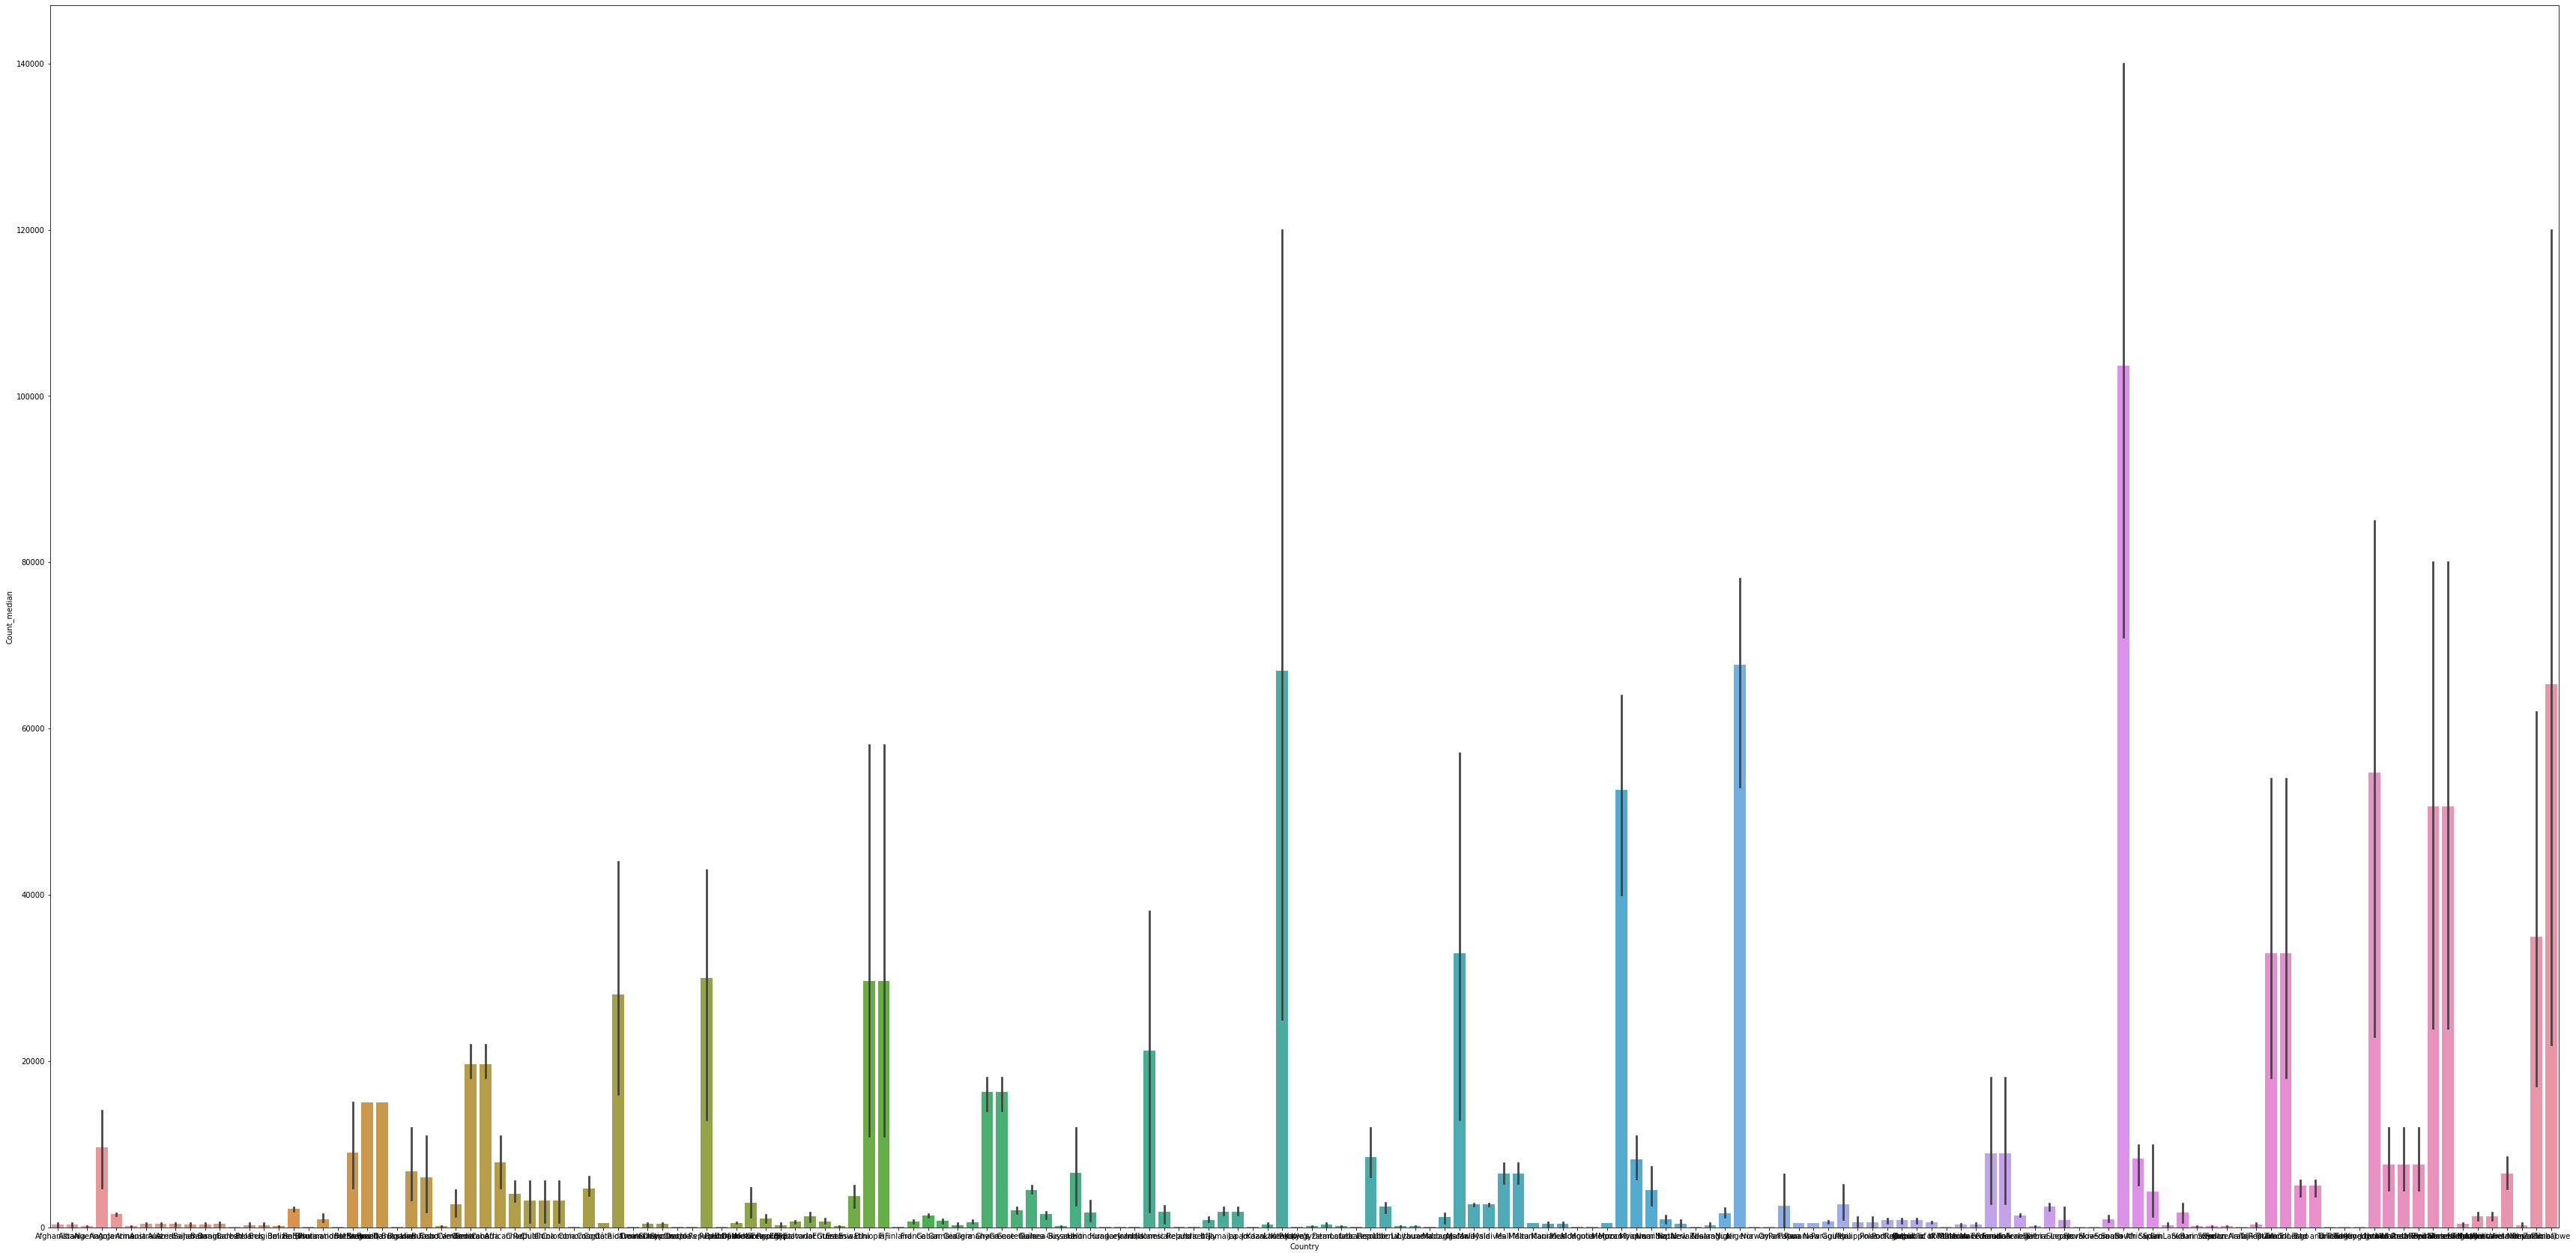

In [ ]:
rcParams["figure.figsize"] = 60,30
sns.barplot(x=country_death["Country"],y=country_death["Count_median"])

In [ ]:
country_sort = country_death.sort_values(by="Count_median",ascending=False)

In [ ]:
country_sort.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region,value_count
310,South Africa,2010,140000[110000–170000],140000,110000.0,170000.0,Africa,140000
509,Zimbabwe,2000,120000[98000–150000],120000,98000.0,150000.0,Africa,120000
423,Kenya,2000,120000[88000–190000],120000,88000.0,190000.0,Africa,120000
480,South Africa,2000,100000[68000–140000],100000,68000.0,140000.0,Africa,100000
497,Uganda,2000,85000[75000–99000],85000,75000.0,99000.0,Africa,85000


# ***อัตราเสียชีวิตของคนติด HIV***

### Africa เป็นทวีบที่คนเสียชีวิตจาก HIV มากที่สุด ลองลงมาคือ western pacificn Americas ,South-East-Asia ,Europe ตามลำดับ

---



In [ ]:
casesbyregion = cases.groupby(["WHO Region","Year"]).mean()["Count_median"]

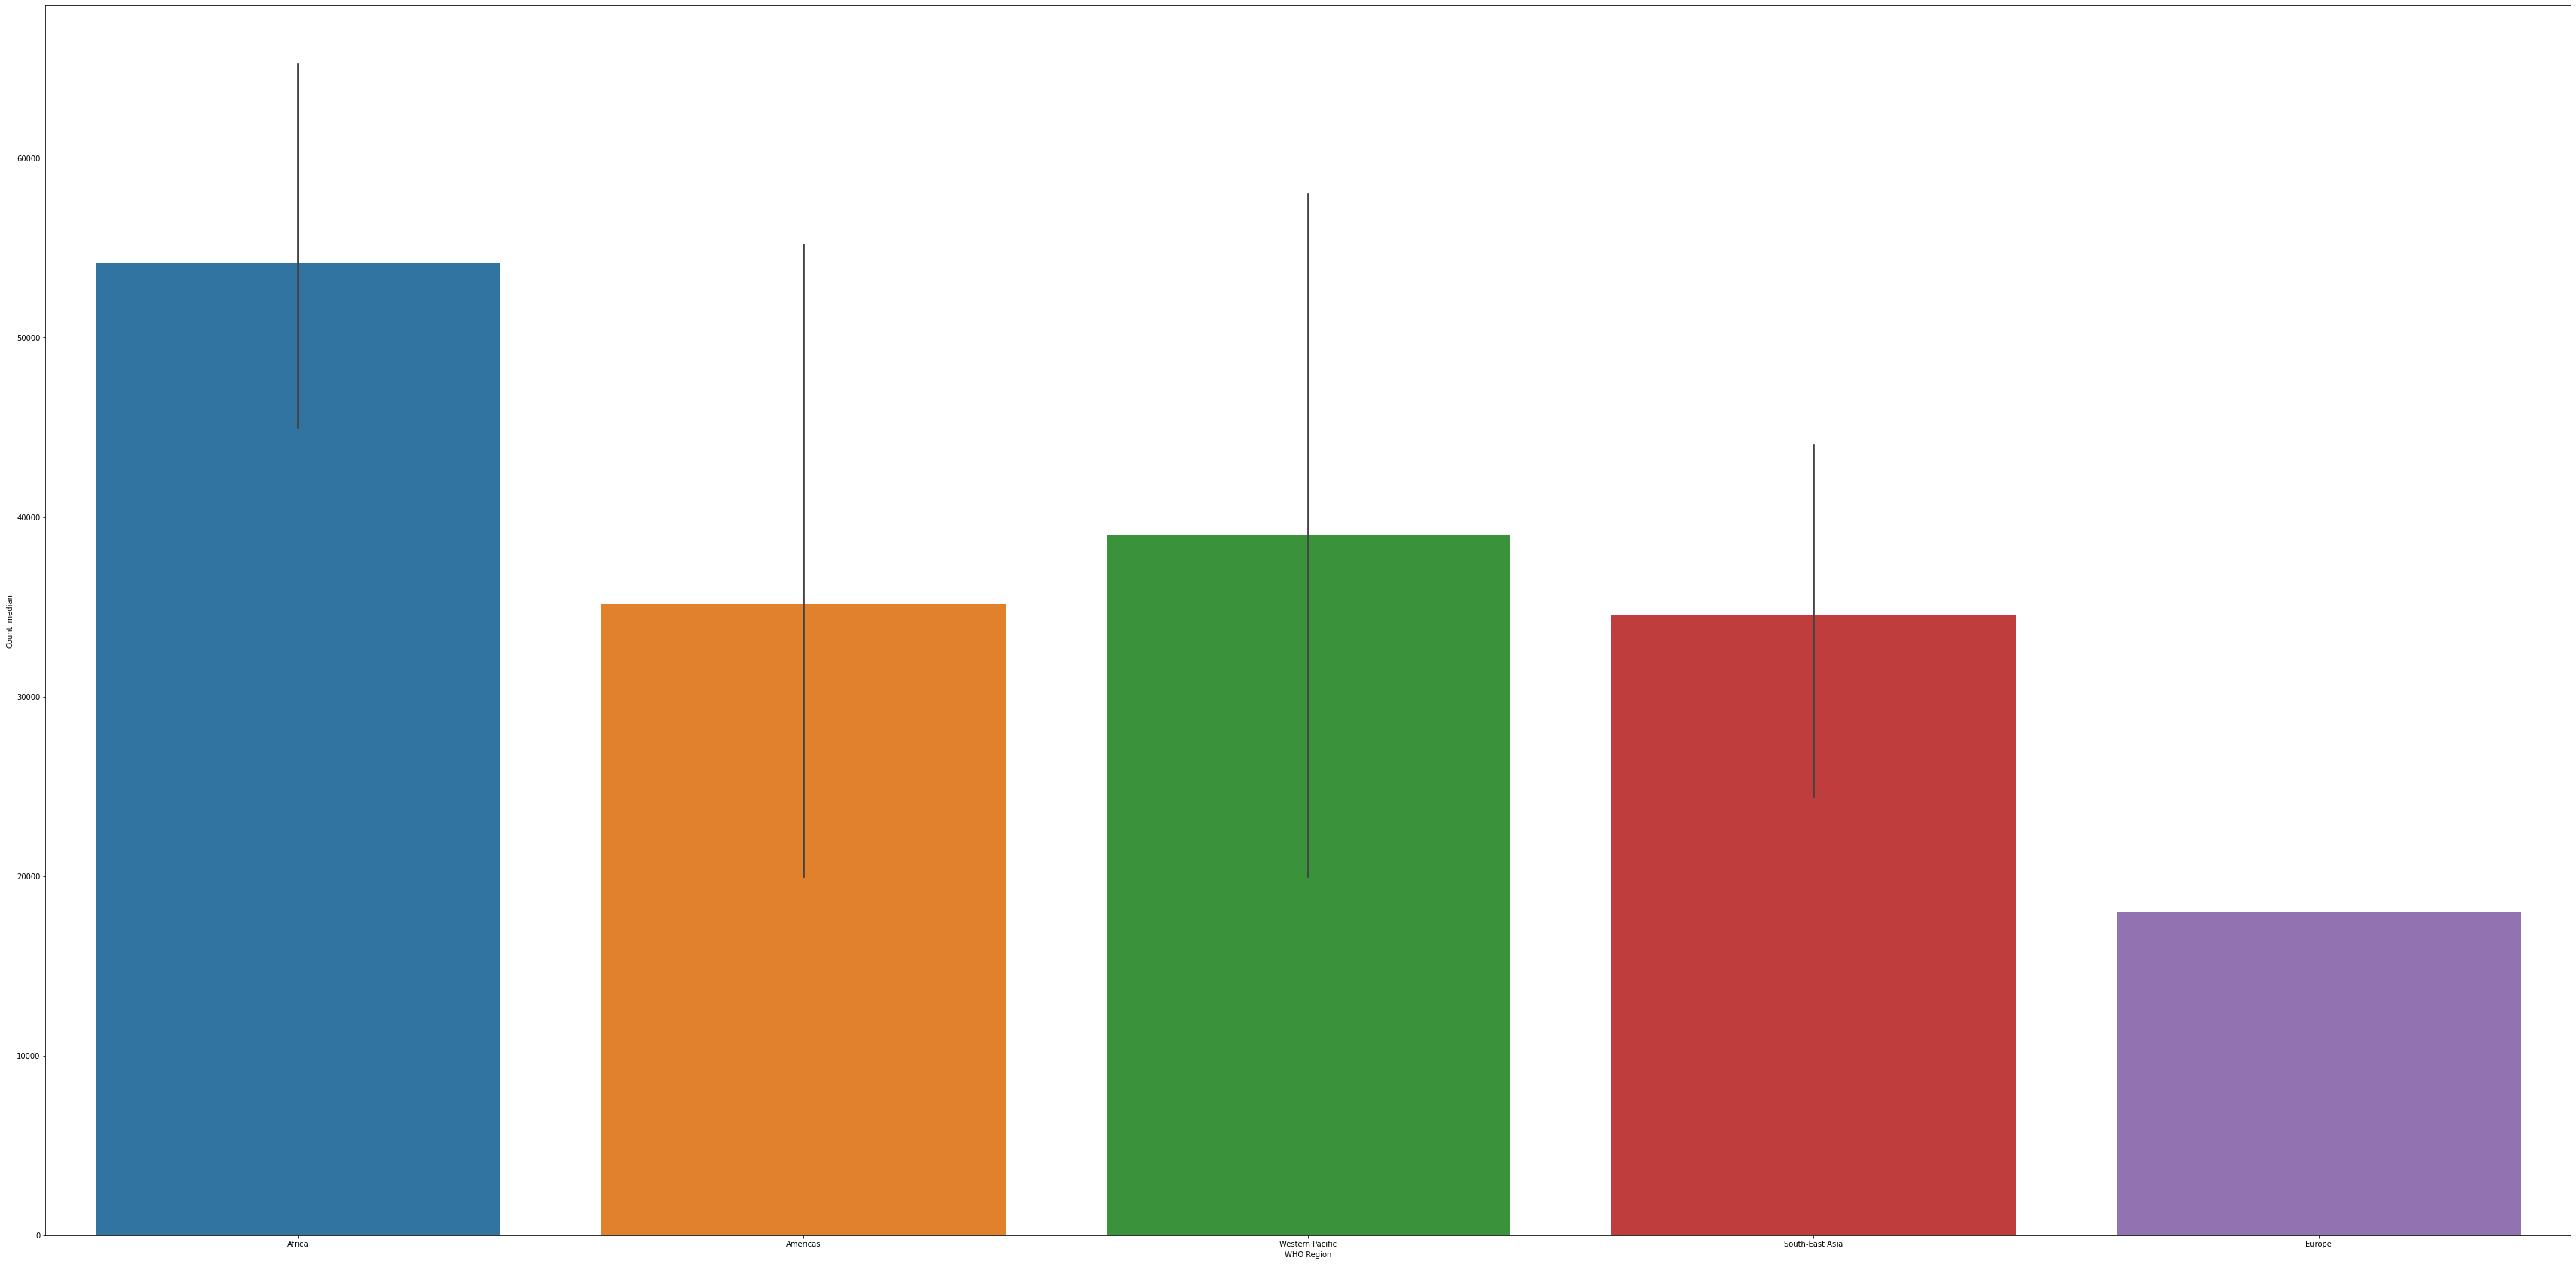

In [ ]:
sns.barplot(x="WHO Region",y="Count_median",data=country_sort[:50])



---



### การเสียชีวิตในแต่ละปี

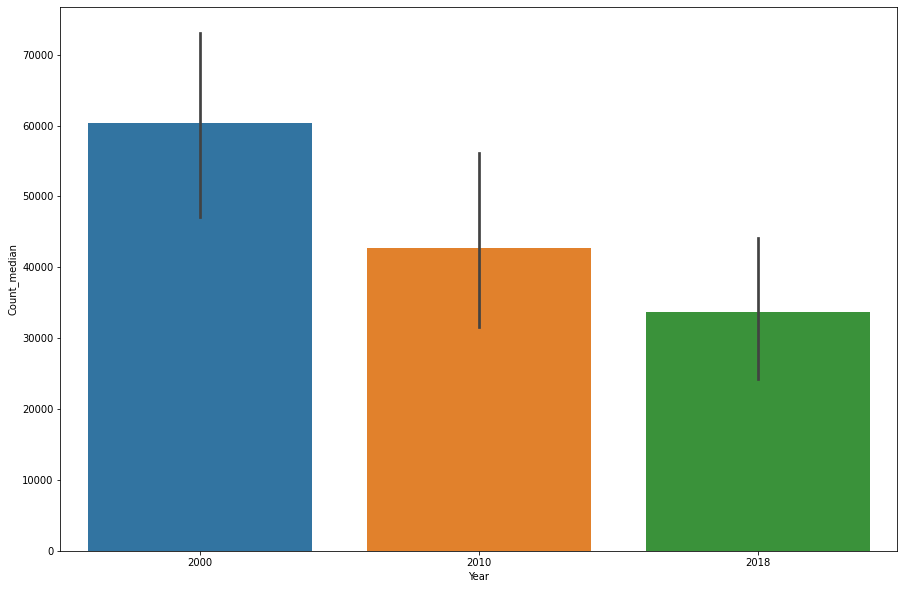

In [ ]:
rcParams["figure.figsize"] = 15,10
sns.barplot(x="Year",y="Count_median",data=country_sort[:50])

### อัตราการเสียชีวิตลดลงในแต่ละปีตั้งแต่ปี2000

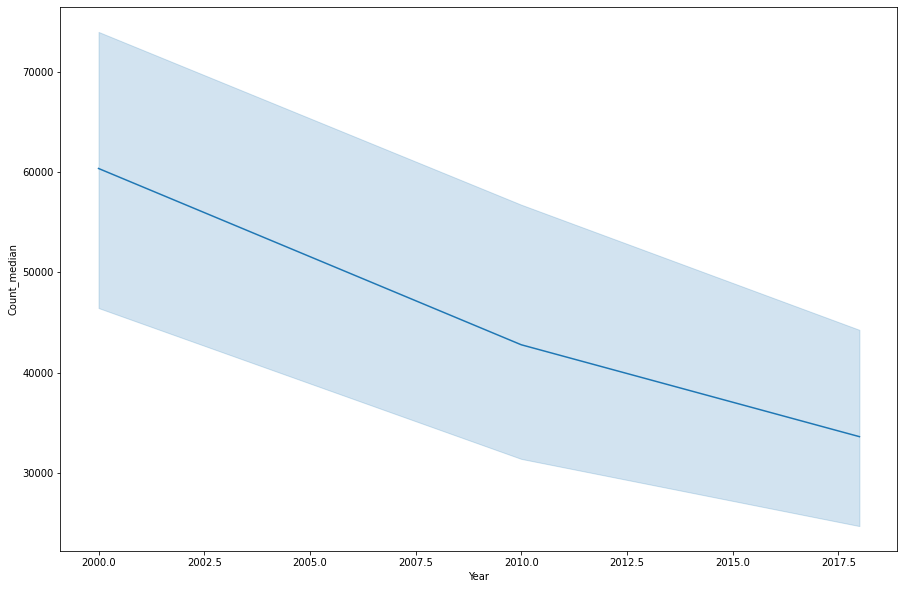

In [ ]:
rcParams["figure.figsize"] = 15,10
sns.lineplot(x="Year",y="Count_median",data=country_sort[:50])



---





---



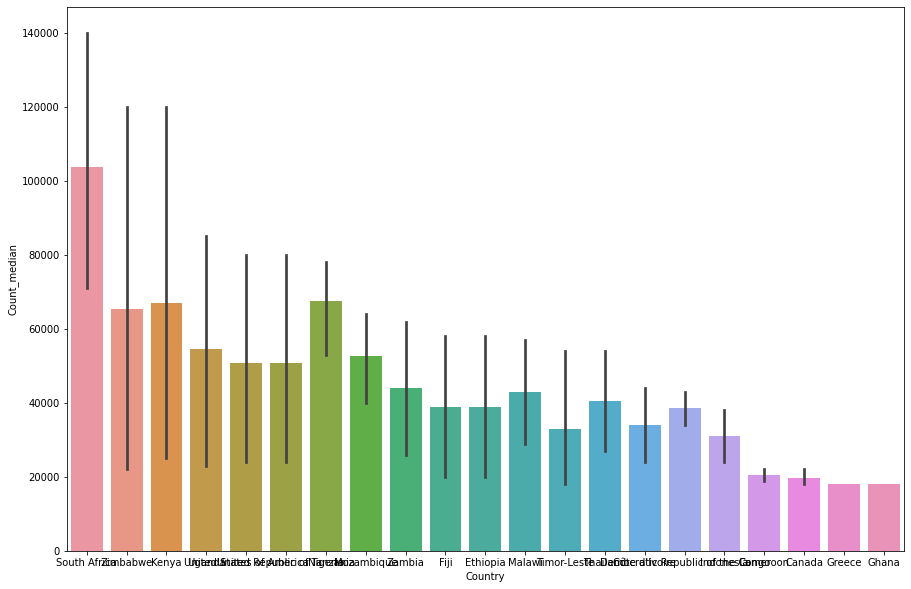

In [ ]:
sns.barplot(x="Country",y="Count_median",data=country_sort[:50])

In [ ]:
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country", locationmode='country names',
                  color=col, hover_name="Country",
                  title=col, color_continuous_scale=pal,width=1000)
#     fig.update_layout(coloraxis_showscale=False)
    fig.show()

### map ของผู้เสียชีวิตจากเชื่อ HIV

In [ ]:
plot_map(country_death, 'Count_median', 'matter')



---



In [ ]:
country_death[country_death["Count_median"]==country_death["Count_median"].max()]

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region,value_count
310,South Africa,2010,140000[110000–170000],140000,110000.0,170000.0,Africa,140000


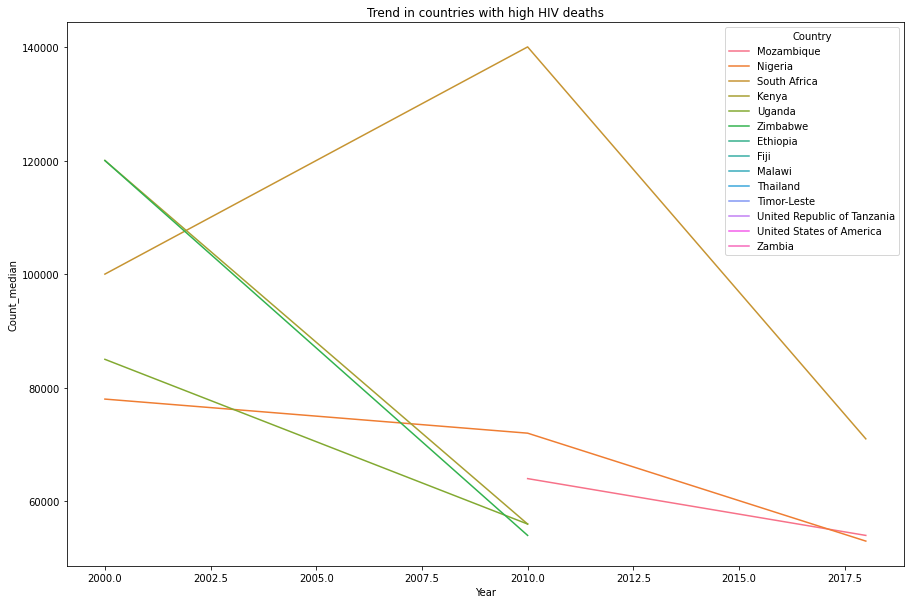

In [ ]:
highestdeaths =country_death[country_death["Count_median"]>=50000]
fig=plt.figure(figsize=(15,10))

sns.lineplot(data=highestdeaths,x="Year",y="Count_median",hue="Country").set_title("Trend in countries with high HIV deaths");
fig.show()

แนวโน้มในประเทศที่มีผู้เสียชีวิตจากเชื้อ HIV สูง

อัตรราการเสียชีวิตลดลง แต่ในกรณีของบางประเทศมีการเสียชีวิตเพิ่มขึ้นในปี 2010 แต่ต่อมาอัตรากำลังลดลง และพบว่า Kenya,Uganda,Ethiopia,Thailand,United Republic of Tanzania ไม่อยู่ในรายชื่อประเทศที่มีอัตราการติดเชื้อที่สูงสุดแต่มีรายชื่อผู้เสียชีวิตสูง

---



# ***ผู้ป่วย HIV***

clean data

---



In [ ]:
living.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,7200[4100–11000],7200.0,4100.0,11000.0,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,16000[15000–17000],16000.0,15000.0,17000.0,Africa
3,Angola,2018,330000[290000–390000],330000.0,290000.0,390000.0,Africa
4,Argentina,2018,140000[130000–150000],140000.0,130000.0,150000.0,Americas


In [ ]:
living.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       680 non-null    object 
 1   Year          680 non-null    int64  
 2   Count         680 non-null    object 
 3   Count_median  553 non-null    float64
 4   Count_min     553 non-null    float64
 5   Count_max     553 non-null    float64
 6   WHO Region    680 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 37.3+ KB


In [ ]:
living.shape

(680, 7)

In [ ]:
living.isna().sum()

Country           0
Year              0
Count             0
Count_median    127
Count_min       127
Count_max       127
WHO Region        0
dtype: int64

In [ ]:
living = living.fillna(method='ffill')

In [ ]:
living.isna().sum()

Country         0
Year            0
Count           0
Count_median    0
Count_min       0
Count_max       0
WHO Region      0
dtype: int64

In [ ]:
living.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,7200[4100–11000],7200.0,4100.0,11000.0,Eastern Mediterranean
1,Albania,2018,na,7200.0,4100.0,11000.0,Europe
2,Algeria,2018,16000[15000–17000],16000.0,15000.0,17000.0,Africa
3,Angola,2018,330000[290000–390000],330000.0,290000.0,390000.0,Africa
4,Argentina,2018,140000[130000–150000],140000.0,130000.0,150000.0,Americas


In [ ]:
livingbyregion =living.groupby(["WHO Region","Year"]).sum()["Count_median"]

In [ ]:
living = living.sort_values(by="Count_median",ascending=False)

In [ ]:
living.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
140,South Africa,2018,7700000[7100000–8300000],7700000.0,7100000.0,8300000.0,Africa
310,South Africa,2010,6100000[5500000–6600000],6100000.0,5500000.0,6600000.0,Africa
480,South Africa,2005,5000000[4400000–5400000],5000000.0,4400000.0,5400000.0,Africa
650,South Africa,2000,3300000[2900000–3700000],3300000.0,2900000.0,3700000.0,Africa
106,Mozambique,2018,2200000[1700000–2700000],2200000.0,1700000.0,2700000.0,Africa


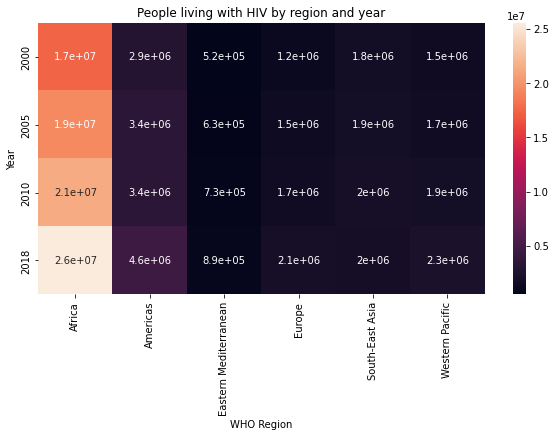

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(livingbyregion.unstack(level=0),annot=True).set_title("People living with HIV by region and year");
fig.show()

การติดเชื้อของผู้ป่วยมีแนวโน้มเพิ่มขึ้นในทุกภูมิภาค ยกเว้นอเมริกา ซึ่งเพิ่มขึ้นจนถึงปี 2010 และลดลงในภายหลัง ทวีปที่ผู้ป่วย สูงสุด:Africa น้อยที่สุด: Eastern
Mediterranean

---



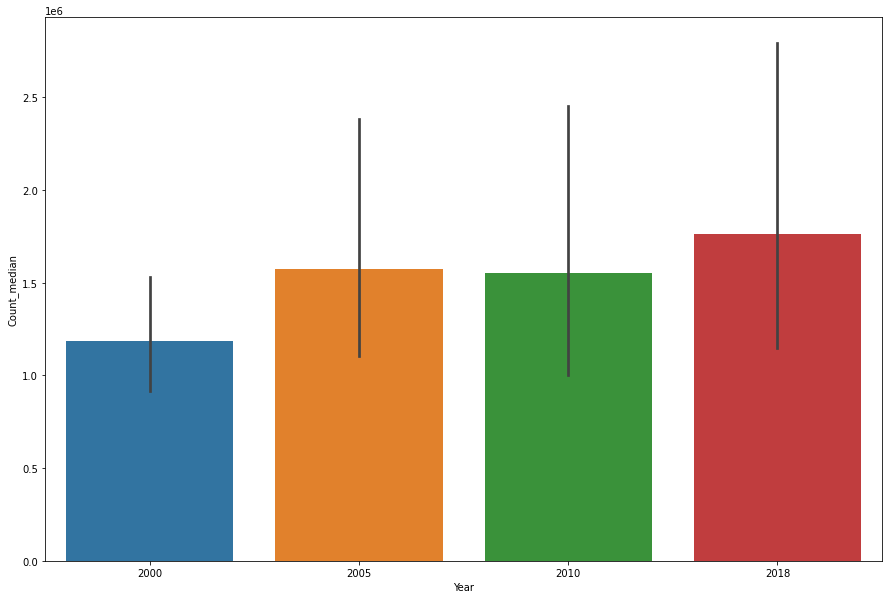

In [ ]:
rcParams["figure.figsize"] = 15,10
sns.barplot(x="Year",y="Count_median",data=living[:50])

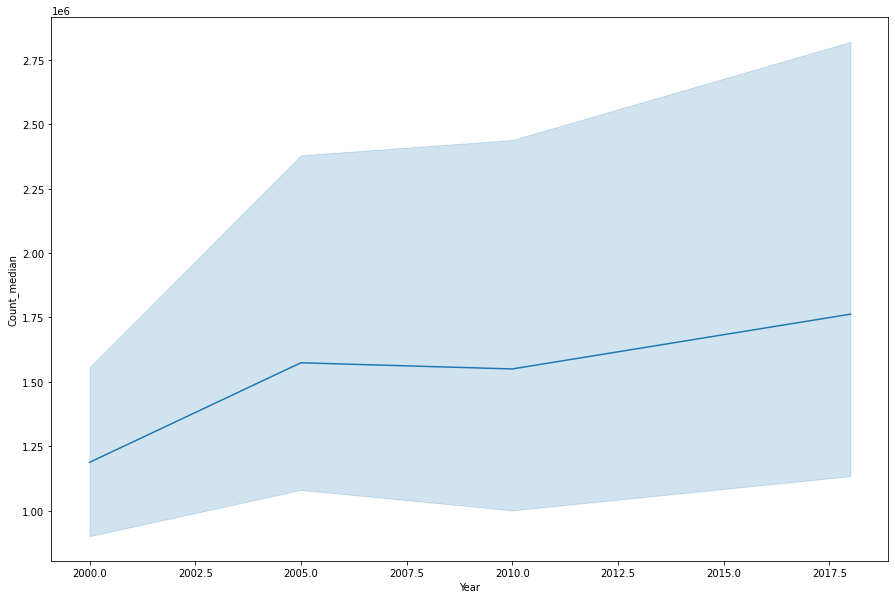

In [ ]:
rcParams["figure.figsize"] = 15,10
sns.lineplot(x="Year",y="Count_median",data=living[:50])

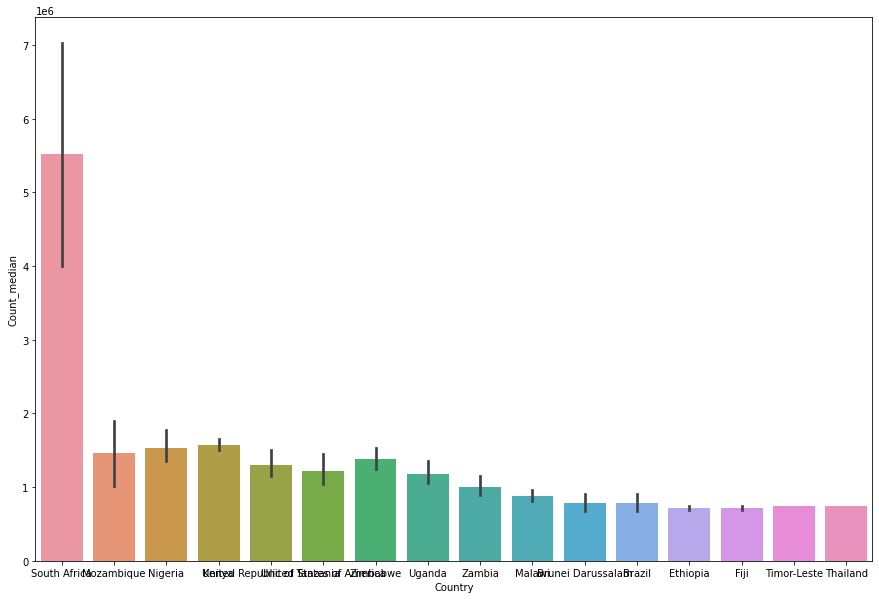

In [ ]:
sns.barplot(x="Country",y="Count_median",data=living[:50])

In [ ]:
plot_map(living, 'Count_median', 'matter')

map ของผู้ป่วย HIV

---



# ***ผู้ที่ได้รับรักษาแบบ  ART***

In [ ]:
coverage.head()

,Country,Reported number of people receiving ART,Estimated number of people living with HIV,Estimated ART coverage among people living with HIV (%),Estimated number of people living with HIV_median,Estimated number of people living with HIV_min,Estimated number of people living with HIV_max,Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max,WHO Region
0,Afghanistan,920,7200[4100–11000],13[7–20],7200.0,4100.0,11000.0,13.0,7.0,20.0,Eastern Mediterranean
1,Albania,580,Nodata,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,12800,16000[15000–17000],81[75–86],16000.0,15000.0,17000.0,81.0,75.0,86.0,Africa
3,Angola,88700,330000[290000–390000],27[23–31],330000.0,290000.0,390000.0,27.0,23.0,31.0,Africa
4,Argentina,85500,140000[130000–150000],61[55–67],140000.0,130000.0,150000.0,61.0,55.0,67.0,Americas


In [ ]:
coverage.columns

Index(['Country', 'Reported number of people receiving ART',
       'Estimated number of people living with HIV',
       'Estimated ART coverage among people living with HIV (%)',
       'Estimated number of people living with HIV_median',
       'Estimated number of people living with HIV_min',
       'Estimated number of people living with HIV_max',
       'Estimated ART coverage among people living with HIV (%)_median',
       'Estimated ART coverage among people living with HIV (%)_min',
       'Estimated ART coverage among people living with HIV (%)_max',
       'WHO Region'],
      dtype='object')

In [ ]:
coverage = coverage.drop([
       'Estimated number of people living with HIV','Estimated ART coverage among people living with HIV (%)',
       'Estimated number of people living with HIV_min',
       'Estimated number of people living with HIV_median',
       'Estimated number of people living with HIV_max',
       'Estimated ART coverage among people living with HIV (%)_min',
       'Estimated ART coverage among people living with HIV (%)_max'],axis=1)

In [ ]:
coverage.columns

Index(['Country', 'Reported number of people receiving ART',
       'Estimated ART coverage among people living with HIV (%)_median',
       'WHO Region'],
      dtype='object')

In [ ]:
coverage.head()

,Country,Reported number of people receiving ART,Estimated ART coverage among people living with HIV (%)_median,WHO Region
0,Afghanistan,920,13.0,Eastern Mediterranean
1,Albania,580,NaN,Europe
2,Algeria,12800,81.0,Africa
3,Angola,88700,27.0,Africa
4,Argentina,85500,61.0,Americas


In [ ]:
coverage["ART"]=coverage["Reported number of people receiving ART"]

In [ ]:
coverage["ART"] = pd.to_numeric(coverage["ART"], errors="coerce")

In [ ]:
coverage["ART"] = coverage.ART.astype(float)

In [ ]:
coverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         170 non-null    object 
 1   Reported number of people receiving ART                         170 non-null    object 
 2   Estimated ART coverage among people living with HIV (%)_median  136 non-null    float64
 3   WHO Region                                                      170 non-null    object 
 4   ART                                                             143 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.8+ KB


In [ ]:
coveragebyregion =coverage.groupby("WHO Region").sum()["ART"]

In [ ]:
coveragebyregion

WHO Region
Africa                   16299000.0
Americas                  1391900.0
Eastern Mediterranean       81910.0
Europe                     770690.0
South-East Asia            655980.0
Western Pacific           1094250.0
Name: ART, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



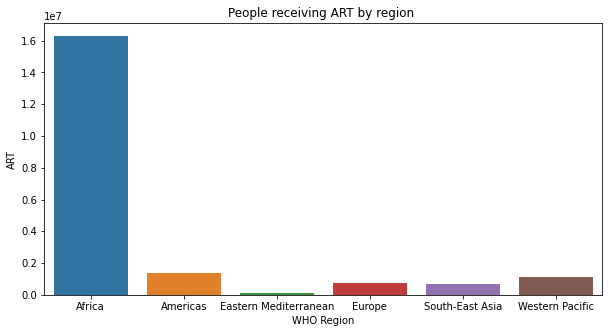

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.barplot(coveragebyregion.index,coveragebyregion).set_title("People receiving ART by region ");
fig.show()

ผู้ที่ได้รับยาต้านไวรัส ART ในแต่ละทวีป

---



In [ ]:
coveragebyregion1 =coverage.groupby("WHO Region").mean()["Estimated ART coverage among people living with HIV (%)_median"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



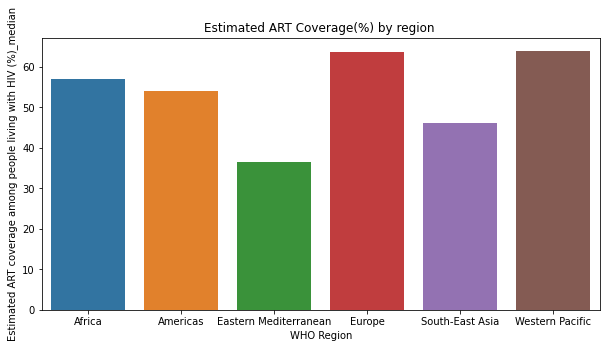

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.barplot(coveragebyregion1.index,coveragebyregion1).set_title("Estimated ART Coverage(%) by region ");
fig.show()

อัตราผู้ป่วย HIV ในแต่ละทวีปที่ได้รับ ART คิดเป็นเปอร์เซ็น มากที่สุด : Europe
และ Western Pacific น้อยสุด: Eastern Mediterranean

---



---



# ***ความต้องการการรักษาแบบ ART***

In [ ]:
prevention.head()

,Country,Received Antiretrovirals,Needing antiretrovirals,Percentage Recieved,Needing antiretrovirals_median,Needing antiretrovirals_min,Needing antiretrovirals_max,Percentage Recieved_median,Percentage Recieved_min,Percentage Recieved_max,WHO Region
0,Afghanistan,20,200[100–500],11[7–18],200.0,100.0,500.0,11.0,7.0,18.0,Eastern Mediterranean
1,Albania,No data,Nodata,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,320,500[500–500],74[69–78],500.0,500.0,500.0,74.0,69.0,78.0,Africa
3,Angola,9600,25000[19000–32000],38[29–48],25000.0,19000.0,32000.0,38.0,29.0,48.0,Africa
4,Argentina,1800,1800[1600–2000],95[85–95],1800.0,1600.0,2000.0,95.0,85.0,95.0,Americas


In [ ]:
prevention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         170 non-null    object 
 1   Received Antiretrovirals        170 non-null    object 
 2   Needing antiretrovirals         170 non-null    object 
 3   Percentage Recieved             166 non-null    object 
 4   Needing antiretrovirals_median  100 non-null    float64
 5   Needing antiretrovirals_min     100 non-null    float64
 6   Needing antiretrovirals_max     100 non-null    float64
 7   Percentage Recieved_median      92 non-null     float64
 8   Percentage Recieved_min         92 non-null     float64
 9   Percentage Recieved_max         92 non-null     float64
 10  WHO Region                      170 non-null    object 
dtypes: float64(6), object(5)
memory usage: 14.7+ KB


In [ ]:
prevention.columns

Index(['Country', 'Received Antiretrovirals', 'Needing antiretrovirals',
       'Percentage Recieved', 'Needing antiretrovirals_median',
       'Needing antiretrovirals_min', 'Needing antiretrovirals_max',
       'Percentage Recieved_median', 'Percentage Recieved_min',
       'Percentage Recieved_max', 'WHO Region'],
      dtype='object')

In [ ]:
prevention= prevention.drop([ 'Needing antiretrovirals',
       'Percentage Recieved',
       'Needing antiretrovirals_min', 'Needing antiretrovirals_max',
       'Percentage Recieved_min',
       'Percentage Recieved_max'],axis=1)

In [ ]:
prevention["recART"]= prevention["Received Antiretrovirals"]

In [ ]:
prevention["recART"]= pd.to_numeric(prevention["recART"],errors='coerce')

In [ ]:
prevention["recART"] = prevention["recART"].astype(float)

In [ ]:
preventionbyregion = prevention.groupby("WHO Region").sum()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



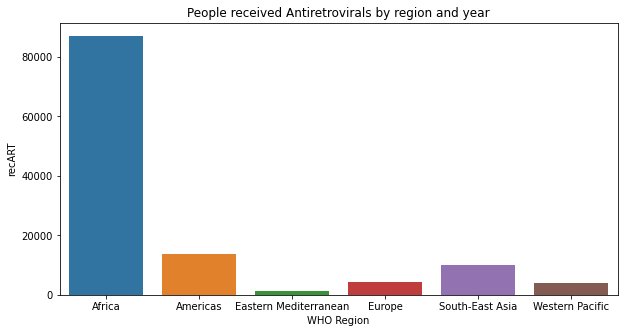

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.barplot(preventionbyregion.index,preventionbyregion["recART"]).set_title("People received Antiretrovirals by region and year");
fig.show()

ผู้ที่ต้องการรับยาต้านไวรัส recART แบ่งตามภูมิภาค

---



In [ ]:
prevention1byregion = prevention.groupby("WHO Region").mean()["Percentage Recieved_median"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



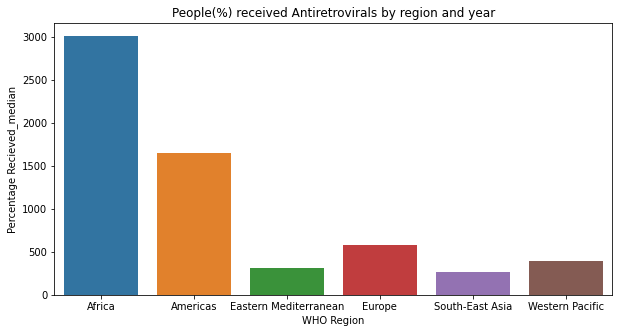

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.barplot(prevention1byregion.index,preventionbyregion["Percentage Recieved_median"]).set_title("People(%) received Antiretrovirals by region and year");
fig.show()

ความต้องการมากที่สุดคืิอ : Africa และ ลองลงมาคือ Americas ต่ำสุดคือ Eastern Mediterranean


---





# ***ภาพรวมต่างๆ***

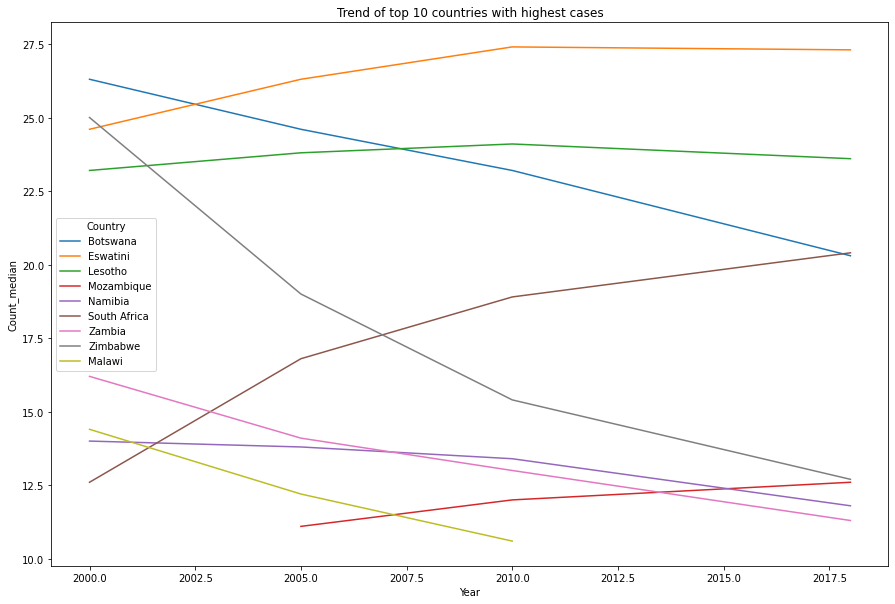

In [ ]:
greater10 =cases[cases["Count_median"]>=10]
fig= plt.figure(figsize=(15,10))

sns.lineplot(data=greater10,x="Year",y="Count_median",hue="Country").set_title("Trend of top 10 countries with highest cases")
fig.show()



---



**แนวโน้มผู้ติดเชื้อส่วนใหญ่ในแต่ละประเทศลดลงเรื่อย แต่ประเทศที่มีแนวโน้มเพิ่มขึ้น : South Africa,Mozambique**

---



In [ ]:
cases.nsmallest(25,"Count_median")

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
6,Australia,2018,0.1[0.1–0.1],0.1,0.1,0.1,Western Pacific
11,Bangladesh,2018,0.1[0.1–0.1],0.1,0.1,0.1,South-East Asia
19,Bosnia and Herzegovina,2018,0.1[0.1–0.1],0.1,0.1,0.1,Europe
23,Bulgaria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Europe
35,Comoros,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
39,Croatia,2018,0.1[0.1–0.1],0.1,0.1,0.1,Europe
42,Czechia,2018,0.1[0.1–0.1],0.1,0.1,0.1,Europe
45,Denmark,2018,0.1[0.1–0.1],0.1,0.1,0.1,Europe


In [ ]:
country_death[country_death["Count_median"]==country_death["Count_median"].max()]

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region,value_count
310,South Africa,2010,140000[110000–170000],140000,110000.0,170000.0,Africa,140000


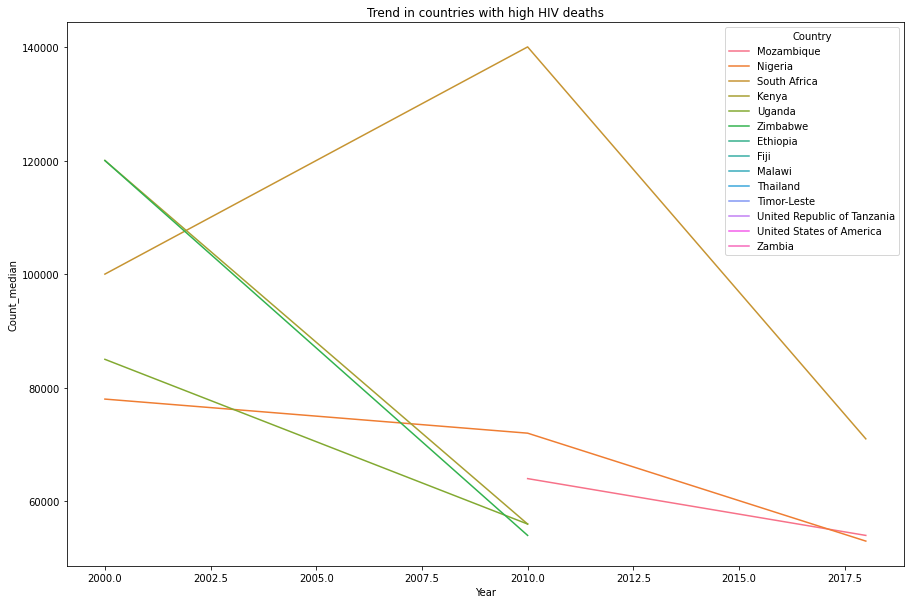

In [ ]:
highestdeaths =country_death[country_death["Count_median"]>=50000]
fig=plt.figure(figsize=(15,10))

sns.lineplot(data=highestdeaths,x="Year",y="Count_median",hue="Country").set_title("Trend in countries with high HIV deaths");
fig.show()

**ประเทศส่วนใหญ่มีอัตราการเสียชีวิตลดลง \
บางประเทศมีอัตราการเสียชีวิตเพิ่มขึ้นถึงปี2010 และเริ่มลดลง \
แต่ประเทศ  Kenya,Uganda,Ethiopia,Thailand,United Republic of Tanzania ไม่อยู่ในรายชื่อประเทศที่มีอัตราการติดเชื้อที่สูงสุดแต่มีรายชื่อผู้เสียชีวิตสูง**

In [ ]:
highestdeaths

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region,value_count
106,Mozambique,2018,54000[39000–73000],54000,39000.0,73000.0,Africa,54000
114,Nigeria,2018,53000[31000–89000],53000,31000.0,89000.0,Africa,53000
140,South Africa,2018,71000[52000–91000],71000,52000.0,91000.0,Africa,71000
253,Kenya,2010,56000[41000–86000],56000,41000.0,86000.0,Africa,56000
276,Mozambique,2010,64000[46000–87000],64000,46000.0,87000.0,Africa,64000
284,Nigeria,2010,72000[42000–120000],72000,42000.0,120000.0,Africa,72000
310,South Africa,2010,140000[110000–170000],140000,110000.0,170000.0,Africa,140000
327,Uganda,2010,56000[48000–66000],56000,48000.0,66000.0,Africa,56000
339,Zimbabwe,2010,54000[43000–68000],54000,43000.0,68000.0,Africa,54000
395,Ethiopia,2000,58000[35000–100000],58000,35000.0,100000.0,Africa,58000


In [ ]:
country_death.nsmallest(25,"Count_median")

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region,value_count
12,Barbados,2018,100[100–100],100,100.0,100.0,Americas,100
17,Bhutan,2018,100[100–200],100,100.0,200.0,South-East Asia,100
19,Bosnia and Herzegovina,2018,100[100–100],100,100.0,100.0,Europe,100
23,Bulgaria,2018,100[100–100],100,100.0,100.0,Europe,100
26,Cabo Verde,2018,100[100–100],100,100.0,100.0,Africa,100
35,Comoros,2018,100[100–100],100,100.0,100.0,Africa,100
39,Croatia,2018,100[100–100],100,100.0,100.0,Europe,100
42,Czechia,2018,100[100–100],100,100.0,100.0,Europe,100
43,Democratic People's Republic of Korea,2018,,100,100.0,100.0,Western Pacific,0
45,Denmark,2018,100[100–100],100,100.0,100.0,Europe,100




---



---



In [ ]:
living[living["Count_median"]==living["Count_median"].max()]

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
140,South Africa,2018,7700000[7100000–8300000],7700000.0,7100000.0,8300000.0,Africa


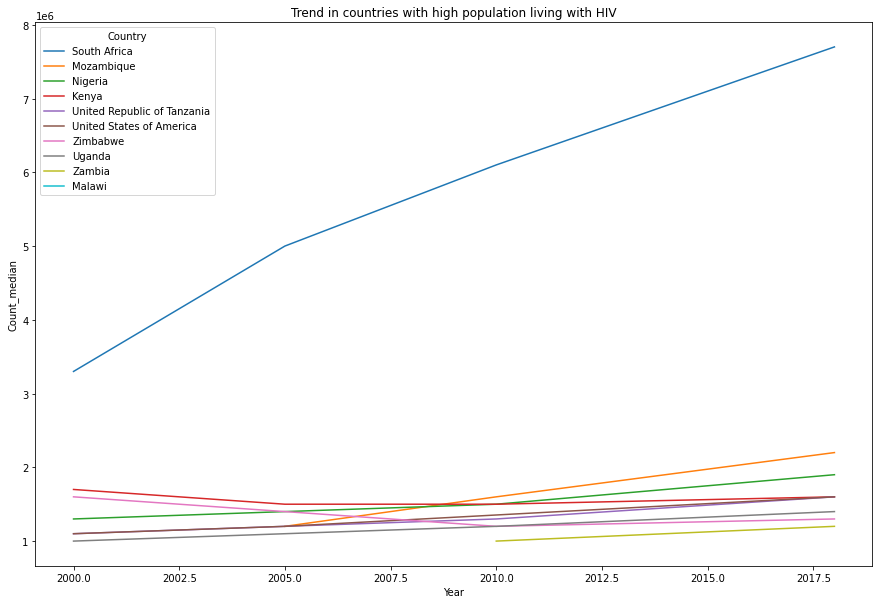

In [ ]:
highestliving =living[living["Count_median"]>=1000000]
fig=plt.figure(figsize=(15,10))
sns.lineplot(data=highestliving,x="Year",y="Count_median",hue="Country").set_title("Trend in countries with high population living with HIV");
fig.show()

In [ ]:
highestliving

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
140,South Africa,2018,7700000[7100000–8300000],7700000.0,7100000.0,8300000.0,Africa
310,South Africa,2010,6100000[5500000–6600000],6100000.0,5500000.0,6600000.0,Africa
480,South Africa,2005,5000000[4400000–5400000],5000000.0,4400000.0,5400000.0,Africa
650,South Africa,2000,3300000[2900000–3700000],3300000.0,2900000.0,3700000.0,Africa
106,Mozambique,2018,2200000[1700000–2700000],2200000.0,1700000.0,2700000.0,Africa
114,Nigeria,2018,1900000[1400000–2600000],1900000.0,1400000.0,2600000.0,Africa
593,Kenya,2000,1700000[1400000–2000000],1700000.0,1400000.0,2000000.0,Africa
161,United Republic of Tanzania,2018,1600000[1400000–1700000],1600000.0,1400000.0,1700000.0,Africa
162,United States of America,2018,na,1600000.0,1400000.0,1700000.0,Americas
83,Kenya,2018,1600000[1300000–1900000],1600000.0,1300000.0,1900000.0,Africa




---



---



***จาการวิเคราะห์ในแต่ละอย่างประเทศที่มาจากทวีป South Africa มีแนวโน้มที่มากกว่าในทุกๆอย่าง***



---



---



## ***ข้อมูลตาราง***

In [ ]:
living.nsmallest(10,"Count_median")

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
468,Republic of North Macedonia,2005,100[100–200],100.0,100.0,200.0,Europe
582,Iceland,2000,100[100–200],100.0,100.0,200.0,Europe
545,Comoros,2000,100[100–100],100.0,100.0,100.0,Africa
529,Bosnia and Herzegovina,2000,100[100–100],100.0,100.0,100.0,Europe
591,Jordan,2000,100[100–200],100.0,100.0,200.0,Eastern Mediterranean
583,India,2000,na,100.0,100.0,200.0,South-East Asia
613,Mongolia,2000,100[100–100],100.0,100.0,100.0,Western Pacific
614,Montenegro,2000,100[100–100],100.0,100.0,100.0,Europe
375,Comoros,2005,100[100–200],100.0,100.0,200.0,Africa
638,Republic of North Macedonia,2000,100[100–100],100.0,100.0,100.0,Europe


In [ ]:
coverage.nlargest(10, ["ART"])

,Country,Reported number of people receiving ART,Estimated ART coverage among people living with HIV (%)_median,WHO Region,ART
140,South Africa,4788000,62.0,Africa,4788000.0
106,Mozambique,1213000,56.0,Africa,1213000.0
169,Zimbabwe,1151000,88.0,Africa,1151000.0
161,United Republic of Tanzania,1109000,71.0,Africa,1109000.0
83,Kenya,1068000,68.0,Africa,1068000.0
114,Nigeria,1016000,53.0,Africa,1016000.0
157,Uganda,1004000,72.0,Africa,1004000.0
168,Zambia,965000,78.0,Africa,965000.0
95,Malawi,814000,78.0,Africa,814000.0
33,China,718000,NaN,Western Pacific,718000.0


In [ ]:
coverage.nlargest(10, ["Estimated ART coverage among people living with HIV (%)_median"])

,Country,Reported number of people receiving ART,Estimated ART coverage among people living with HIV (%)_median,WHO Region,ART
108,Namibia,184000,92.0,Africa,184000.0
78,Italy,118000,91.0,Europe,118000.0
124,Portugal,37200,90.0,Europe,37200.0
26,Cabo Verde,2200,89.0,Africa,2200.0
45,Denmark,5500,89.0,Europe,5500.0
169,Zimbabwe,1151000,88.0,Africa,1151000.0
131,Rwanda,194000,87.0,Africa,194000.0
54,Eswatini,177000,86.0,Africa,177000.0
81,Jordan,310,84.0,Eastern Mediterranean,310.0
142,Spain,125000,84.0,Europe,125000.0


In [ ]:
coverage.nsmallest(10, ["Estimated ART coverage among people living with HIV (%)_median"])

,Country,Reported number of people receiving ART,Estimated ART coverage among people living with HIV (%)_median,WHO Region,ART
94,Madagascar,3500,9.0,Africa,3500.0
117,Pakistan,15800,10.0,Eastern Mediterranean,15800.0
0,Afghanistan,920,13.0,Eastern Mediterranean,920.0
144,Sudan,9000,15.0,Eastern Mediterranean,9000.0
141,South Sudan,30700,16.0,Africa,30700.0
74,Indonesia,108000,17.0,South-East Asia,108000.0
75,Iran (Islamic Republic of),12400,20.0,Eastern Mediterranean,12400.0
148,Syrian Arab Republic,130,20.0,Eastern Mediterranean,130.0
167,Yemen,2200,21.0,Eastern Mediterranean,2200.0
11,Bangladesh,3000,22.0,South-East Asia,3000.0


In [ ]:
coverage.nsmallest(10, ["ART"])

,Country,Reported number of people receiving ART,Estimated ART coverage among people living with HIV (%)_median,WHO Region,ART
35,Comoros,100,79.0,Africa,100.0
148,Syrian Arab Republic,130,20.0,Eastern Mediterranean,130.0
22,Brunei Darussalam,150,NaN,Western Pacific,150.0
125,Qatar,150,NaN,Eastern Mediterranean,150.0
104,Montenegro,160,40.0,Europe,160.0
103,Mongolia,200,32.0,Western Pacific,200.0
19,Bosnia and Herzegovina,220,67.0,Europe,220.0
128,Republic of North Macedonia,240,54.0,Europe,240.0
72,Iceland,250,79.0,Europe,250.0
81,Jordan,310,84.0,Eastern Mediterranean,310.0


In [ ]:
prevention.nlargest(10, "Needing antiretrovirals_median")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
140,South Africa,248 000,290000.0,87.0,Africa,NaN
106,Mozambique,109 000,110000.0,95.0,Africa,NaN
114,Nigeria,43 700,100000.0,44.0,Africa,NaN
157,Uganda,94 800,100000.0,93.0,Africa,NaN
161,United Republic of Tanzania,77 000,83000.0,93.0,Africa,NaN
83,Kenya,57 500,63000.0,91.0,Africa,NaN
169,Zimbabwe,59 600,63000.0,94.0,Africa,NaN
168,Zambia,56 500,48000.0,95.0,Africa,NaN
95,Malawi,47 100,45000.0,95.0,Africa,NaN
28,Cameroon,21 700,27000.0,80.0,Africa,NaN


ประเทศที่ต้องการสูงสุดอยู่ในแอฟริกา

---



In [ ]:
prevention.nsmallest(10, "Needing antiretrovirals_median")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
6,Australia,No data,100.0,NaN,Western Pacific,NaN
9,Bahamas,50,100.0,58.0,Americas,50.0
15,Belize,40,100.0,44.0,Americas,40.0
76,Ireland,No data,100.0,NaN,Europe,NaN
77,Israel,No data,100.0,NaN,Europe,NaN
101,Mauritius,110,100.0,95.0,Africa,110.0
145,Suriname,90,100.0,95.0,Americas,90.0
0,Afghanistan,20,200.0,11.0,Eastern Mediterranean,20.0
11,Bangladesh,40,200.0,28.0,South-East Asia,40.0
40,Cuba,180,200.0,95.0,Americas,180.0


In [ ]:
prevention.nlargest(10,"recART")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
3,Angola,9600,25000.0,38.0,Africa,9600.0
54,Eswatini,8600,11000.0,79.0,Africa,8600.0
131,Rwanda,8600,8100.0,95.0,Africa,8600.0
89,Lesotho,8200,11000.0,77.0,Africa,8200.0
31,Chad,5600,10000.0,56.0,Africa,5600.0
141,South Sudan,5500,9900.0,56.0,Africa,5500.0
69,Haiti,4900,5900.0,83.0,Americas,4900.0
24,Burkina Faso,4700,4900.0,95.0,Africa,4700.0
16,Benin,4600,2600.0,95.0,Africa,4600.0
135,Sierra Leone,4400,NaN,NaN,Africa,4400.0


In [ ]:
prevention.nsmallest(10,"recART")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
10,Bahrain,0,NaN,NaN,Eastern Mediterranean,0.0
22,Brunei Darussalam,0,NaN,NaN,Western Pacific,0.0
35,Comoros,0,NaN,NaN,Africa,0.0
84,Kuwait,0,NaN,NaN,Eastern Mediterranean,0.0
111,New Zealand,0,NaN,NaN,Western Pacific,0.0
42,Czechia,10,NaN,NaN,Europe,10.0
148,Syrian Arab Republic,10,NaN,NaN,Eastern Mediterranean,10.0
154,Tunisia,10,NaN,NaN,Eastern Mediterranean,10.0
159,United Arab Emirates,10,NaN,NaN,Eastern Mediterranean,10.0
0,Afghanistan,20,200.0,11.0,Eastern Mediterranean,20.0


In [ ]:
prevention.nlargest(10,"Percentage Recieved_median")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
4,Argentina,1800,1800.0,95.0,Americas,1800.0
16,Benin,4600,2600.0,95.0,Africa,4600.0
18,Bolivia (Plurinational State of),350,500.0,95.0,Americas,350.0
20,Botswana,12 400,13000.0,95.0,Africa,NaN
24,Burkina Faso,4700,4900.0,95.0,Africa,4700.0
32,Chile,370,500.0,95.0,Americas,370.0
40,Cuba,180,200.0,95.0,Americas,180.0
48,Ecuador,370,500.0,95.0,Americas,370.0
79,Jamaica,400,500.0,95.0,Americas,400.0
95,Malawi,47 100,45000.0,95.0,Africa,NaN


In [ ]:
prevention.nsmallest(10,"Percentage Recieved_median")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
144,Sudan,100,2000.0,5.0,Eastern Mediterranean,100.0
117,Pakistan,320,3200.0,10.0,Eastern Mediterranean,320.0
0,Afghanistan,20,200.0,11.0,Eastern Mediterranean,20.0
167,Yemen,30,500.0,13.0,Eastern Mediterranean,30.0
74,Indonesia,1800,12000.0,15.0,South-East Asia,1800.0
49,Egypt,60,500.0,16.0,Eastern Mediterranean,60.0
122,Philippines,70,500.0,18.0,Western Pacific,70.0
139,Somalia,90,500.0,19.0,Eastern Mediterranean,90.0
34,Colombia,490,2300.0,21.0,Americas,490.0
98,Mali,2400,10000.0,24.0,Africa,2400.0


# ***วิเคราะห์ประเทศในทวีป Africa***

In [ ]:
Africa = cases[cases["WHO Region"]=="Africa"]
Africa[Africa["Count_median"]==Africa["Count_median"].max()]

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
224,Eswatini,2010,27.4[25.2–29.3],27.4,25.2,29.3,Africa


*ประเทศที่เคสเยอะสุด : Eswatini*

---



In [ ]:
Africad = country_death[country_death["WHO Region"]=="Africa"]
Africad[Africad["Count_median"]==Africad["Count_median"].max()]

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region,value_count
310,South Africa,2010,140000[110000–170000],140000,110000.0,170000.0,Africa,140000


*ประเทศที่เสียชีวิตเยอะสุด : South Africa*

---



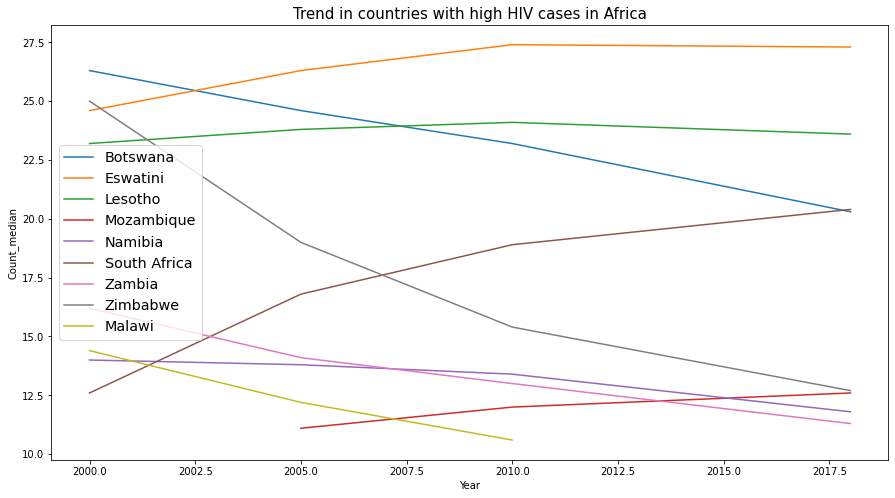

In [ ]:
Africatop = Africa[Africa["Count_median"]>=10]
fig = plt.figure(figsize=(15,8))

ax1=sns.lineplot(data=Africatop,x="Year",y="Count_median",hue="Country").set_title("Trend in countries with high HIV cases in Africa",fontsize="15");
plt.legend(fontsize="x-large");

*ประเทศที่มีแนวโน้มผู้ป่วยเพิ่มขึ้น : Eswatini,Lesotho,South Africa*

---



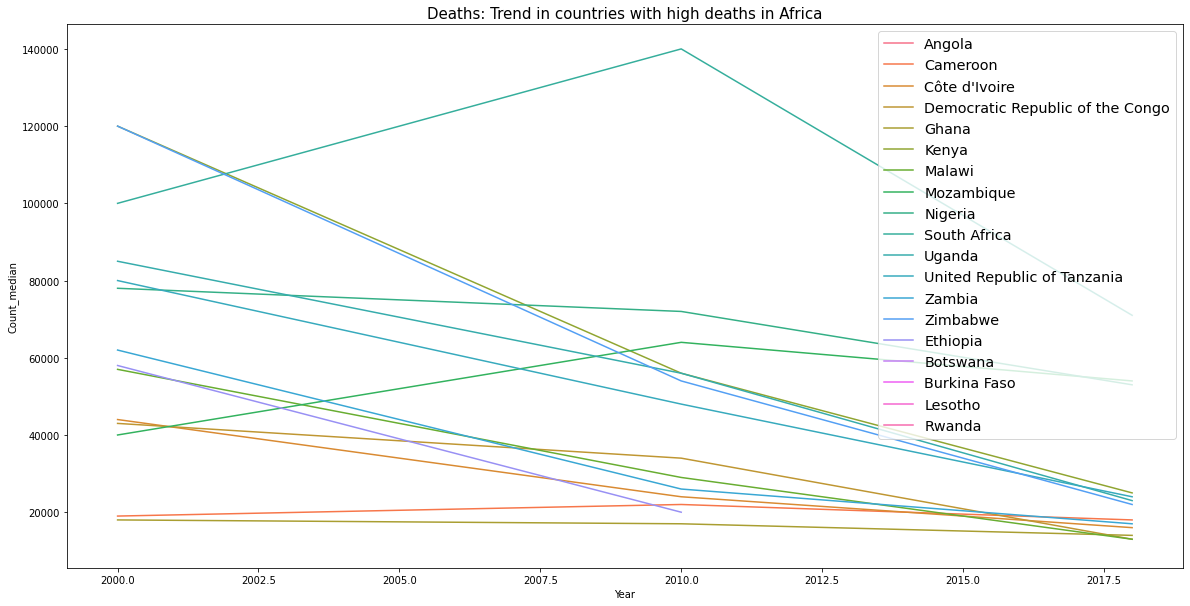

In [ ]:
Africadtop = Africad[Africad["Count_median"]>=12000]
fig = plt.figure(figsize=(20,10))

ax1=sns.lineplot(data=Africadtop,x="Year",y="Count_median",hue="Country").set_title("Deaths: Trend in countries with high deaths in Africa",fontsize="15");
plt.legend(fontsize="x-large");

***มีประเทศที่แนวโน้มการเสียชีวิตเพิ่มขึ้นน้อยมาก ส่วยใหญ่ลดลง***

---



In [ ]:
AfricaART=coverage[coverage["WHO Region"]=="Africa"]
AfricaART.nlargest(10,"Estimated ART coverage among people living with HIV (%)_median")

,Country,Reported number of people receiving ART,Estimated ART coverage among people living with HIV (%)_median,WHO Region,ART
108,Namibia,184000,92.0,Africa,184000.0
26,Cabo Verde,2200,89.0,Africa,2200.0
169,Zimbabwe,1151000,88.0,Africa,1151000.0
131,Rwanda,194000,87.0,Africa,194000.0
54,Eswatini,177000,86.0,Africa,177000.0
20,Botswana,307000,83.0,Africa,307000.0
2,Algeria,12800,81.0,Africa,12800.0
25,Burundi,65500,80.0,Africa,65500.0
35,Comoros,100,79.0,Africa,100.0
95,Malawi,814000,78.0,Africa,814000.0


เรียงตามเปอร์เซนการการรักษา ART

---



In [ ]:
AfricaART.nlargest(10, "ART")

,Country,Reported number of people receiving ART,Estimated ART coverage among people living with HIV (%)_median,WHO Region,ART
140,South Africa,4788000,62.0,Africa,4788000.0
106,Mozambique,1213000,56.0,Africa,1213000.0
169,Zimbabwe,1151000,88.0,Africa,1151000.0
161,United Republic of Tanzania,1109000,71.0,Africa,1109000.0
83,Kenya,1068000,68.0,Africa,1068000.0
114,Nigeria,1016000,53.0,Africa,1016000.0
157,Uganda,1004000,72.0,Africa,1004000.0
168,Zambia,965000,78.0,Africa,965000.0
95,Malawi,814000,78.0,Africa,814000.0
55,Ethiopia,450000,65.0,Africa,450000.0


เรียงตามจำนวนผู้ที่ได้รับการรักษาแบบ ART \
ประเทศ South Africa	ได้รับการรักษาเยอะสุด แต่เปอร์เซนแค่ 62 %

---



In [ ]:
Africaprev=prevention[prevention["WHO Region"]=="Africa"]
Africaprev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 2 to 169
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         44 non-null     object 
 1   Received Antiretrovirals        44 non-null     object 
 2   Needing antiretrovirals_median  41 non-null     float64
 3   Percentage Recieved_median      41 non-null     float64
 4   WHO Region                      44 non-null     object 
 5   recART                          27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 2.4+ KB


In [ ]:
Africaprev.nlargest(10,"Needing antiretrovirals_median")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
140,South Africa,248 000,290000.0,87.0,Africa,NaN
106,Mozambique,109 000,110000.0,95.0,Africa,NaN
114,Nigeria,43 700,100000.0,44.0,Africa,NaN
157,Uganda,94 800,100000.0,93.0,Africa,NaN
161,United Republic of Tanzania,77 000,83000.0,93.0,Africa,NaN
83,Kenya,57 500,63000.0,91.0,Africa,NaN
169,Zimbabwe,59 600,63000.0,94.0,Africa,NaN
168,Zambia,56 500,48000.0,95.0,Africa,NaN
95,Malawi,47 100,45000.0,95.0,Africa,NaN
28,Cameroon,21 700,27000.0,80.0,Africa,NaN


***เปอร์เซนการได้รับการป้องกันอยู่ในระดับดี ยกเว้นประเทศ Nigerai : 44%***

---



In [ ]:
Africaprev.nsmallest(10,"Needing antiretrovirals_median")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
101,Mauritius,110,100.0,95.0,Africa,110.0
100,Mauritania,50,200.0,38.0,Africa,50.0
2,Algeria,320,500.0,74.0,Africa,320.0
52,Eritrea,230,500.0,48.0,Africa,230.0
60,Gambia,700,1000.0,68.0,Africa,700.0
94,Madagascar,280,1100.0,25.0,Africa,280.0
113,Niger,940,1600.0,58.0,Africa,940.0
90,Liberia,1800,2000.0,93.0,Africa,1800.0
67,Guinea-Bissau,1000,2100.0,48.0,Africa,1000.0
133,Senegal,1400,2200.0,65.0,Africa,1400.0


In [ ]:
Africaprev.nlargest(10,"recART")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
3,Angola,9600,25000.0,38.0,Africa,9600.0
54,Eswatini,8600,11000.0,79.0,Africa,8600.0
131,Rwanda,8600,8100.0,95.0,Africa,8600.0
89,Lesotho,8200,11000.0,77.0,Africa,8200.0
31,Chad,5600,10000.0,56.0,Africa,5600.0
141,South Sudan,5500,9900.0,56.0,Africa,5500.0
24,Burkina Faso,4700,4900.0,95.0,Africa,4700.0
16,Benin,4600,2600.0,95.0,Africa,4600.0
135,Sierra Leone,4400,NaN,NaN,Africa,4400.0
152,Togo,4300,5400.0,80.0,Africa,4300.0


***ประเทศ Angola ต้องการการรักษาแบบ ART มากที่สุด แต่กับได้น้อยคิดเป็นเพียง 38%***

---



In [ ]:
Africaprev.nlargest(10,"Percentage Recieved_median")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
16,Benin,4600,2600.0,95.0,Africa,4600.0
20,Botswana,12 400,13000.0,95.0,Africa,NaN
24,Burkina Faso,4700,4900.0,95.0,Africa,4700.0
95,Malawi,47 100,45000.0,95.0,Africa,NaN
101,Mauritius,110,100.0,95.0,Africa,110.0
106,Mozambique,109 000,110000.0,95.0,Africa,NaN
108,Namibia,12 100,10000.0,95.0,Africa,NaN
131,Rwanda,8600,8100.0,95.0,Africa,8600.0
168,Zambia,56 500,48000.0,95.0,Africa,NaN
169,Zimbabwe,59 600,63000.0,94.0,Africa,NaN


In [ ]:
Africaprev.nsmallest(10,"Percentage Recieved_median")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
98,Mali,2400,10000.0,24.0,Africa,2400.0
94,Madagascar,280,1100.0,25.0,Africa,280.0
3,Angola,9600,25000.0,38.0,Africa,9600.0
100,Mauritania,50,200.0,38.0,Africa,50.0
44,Democratic Republic of the Congo,11 400,26000.0,44.0,Africa,NaN
114,Nigeria,43 700,100000.0,44.0,Africa,NaN
52,Eritrea,230,500.0,48.0,Africa,230.0
67,Guinea-Bissau,1000,2100.0,48.0,Africa,1000.0
51,Equatorial Guinea,1300,2600.0,50.0,Africa,1300.0
31,Chad,5600,10000.0,56.0,Africa,5600.0


# ***ทำโมเดล***

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
living.info()

In [ ]:
cases["Year"].unique()

array([2018, 2010, 2005, 2000])

In [ ]:
c2000 = cases[cases["Year"]==2000][["Country","Count_median"]].set_index("Country")
c2010 = cases[cases["Year"]==2010][["Country","Count_median"]].set_index("Country")
c2018 = cases[cases["Year"]==2018][["Country","Count_median"]].set_index("Country")

In [ ]:
c2000

In [ ]:
d2000 = country_death[country_death["Year"]==2000][["Country","Count_median"]].set_index("Country")
d2010 = country_death[country_death["Year"]==2010][["Country","Count_median"]].set_index("Country")
d2018 = country_death[country_death["Year"]==2018][["Country","Count_median"]].set_index("Country")

In [ ]:
d2000

In [ ]:
l2000 = living[living["Year"]==2000][["Country","Count_median"]].set_index("Country")
l2010 = living[living["Year"]==2010][["Country","Count_median"]].set_index("Country")
l2018 = living[living["Year"]==2018][["Country","Count_median"]].set_index("Country")

In [ ]:
l2000

In [ ]:
Trend = pd.DataFrame()
Trend["Country"]=cases["Country"].unique()
Trend["death(2000)"]= Trend["Country"].apply(lambda x: d2000.loc[x,"Count_median"])
Trend["living(2000)"]= Trend["Country"].apply(lambda x: l2000.loc[x,"Count_median"])

In [ ]:
Test2010 = pd.DataFrame()
Test2010["Country"]=cases["Country"].unique()
Test2010["death(2010)"]= Test2010["Country"].apply(lambda x: d2010.loc[x,"Count_median"])
Test2010["living(2010)"]= Test2010["Country"].apply(lambda x: l2010.loc[x,"Count_median"])

In [ ]:
Test2018 = pd.DataFrame()
Test2018["Country"]=cases["Country"].unique()
Test2018["death(2018)"]= Test2018["Country"].apply(lambda x: d2018.loc[x,"Count_median"])
Test2018["living(2018)"]= Test2018["Country"].apply(lambda x: l2018.loc[x,"Count_median"])

In [ ]:
Trend

In [ ]:
Test2010

In [ ]:
Test2018

In [ ]:
Trend.nlargest(5,['living(2000)'])

,Country,death(2000),living(2000)
140,South Africa,100000,3300000.0
83,Kenya,120000,1700000.0
169,Zimbabwe,120000,1600000.0
114,Nigeria,78000,1300000.0
161,United Republic of Tanzania,80000,1100000.0


In [ ]:
Test2010.nlargest(5,['living(2010)'])

,Country,death(2010),living(2010)
140,South Africa,140000,6100000.0
106,Mozambique,64000,1600000.0
83,Kenya,56000,1500000.0
114,Nigeria,72000,1500000.0
161,United Republic of Tanzania,48000,1300000.0


In [ ]:
Test2018.nlargest(5,['living(2018)'])

,Country,death(2018),living(2018)
140,South Africa,71000,7700000.0
106,Mozambique,54000,2200000.0
114,Nigeria,53000,1900000.0
83,Kenya,25000,1600000.0
161,United Republic of Tanzania,24000,1600000.0


In [ ]:
Trend.drop(140 , inplace=True)

In [ ]:
Test2010.drop(140 , inplace=True)

In [ ]:
Test2018.drop(140 , inplace=True)

In [ ]:
Test2018.nlargest(5,['living(2018)'])

,Country,death(2018),living(2018)
106,Mozambique,54000,2200000.0
114,Nigeria,53000,1900000.0
83,Kenya,25000,1600000.0
161,United Republic of Tanzania,24000,1600000.0
162,United States of America,24000,1600000.0


In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(Trend["living(2000)"], Trend["death(2000)"])
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
plt.figure(figsize=(12,9))

plt.scatter(Test2010["living(2010)"], Test2010["death(2010)"])
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(Test2018["living(2018)"], Test2018["death(2018)"])
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
Trend.isna().sum()

In [ ]:
Test2018.info()



---



## ***จัดการกับ Skew Data ด้วย Log Transform***

In [ ]:
x = np.log(Trend["living(2000)"]) / np.log(10)

In [ ]:
y = np.log(Trend["death(2000)"]) / np.log(10)

In [ ]:
xt = np.log(Test2010["living(2010)"]) / np.log(10)

In [ ]:
yt = np.log(Test2010["death(2010)"]) / np.log(10)

In [ ]:
xt2 = np.log(Test2018["living(2018)"]) / np.log(10)

In [ ]:
yt2 = np.log(Test2018["death(2018)"]) / np.log(10)

### ***กราฟที่ได้หลังจัดการ***

Text(0, 0.5, 'y')

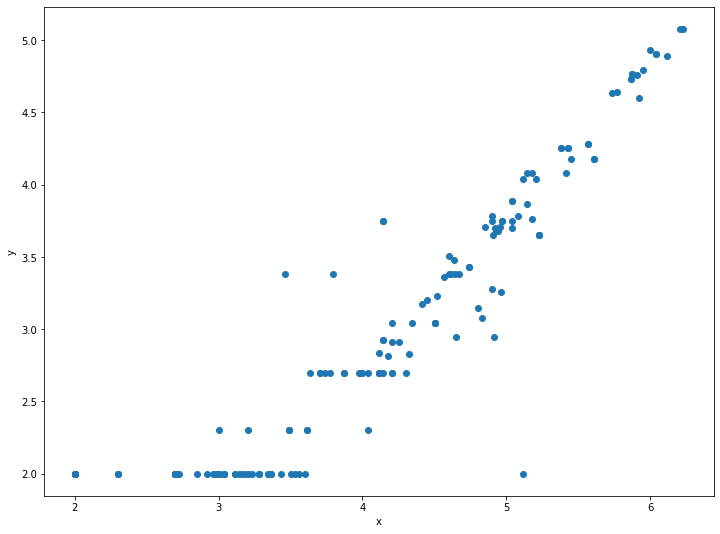

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

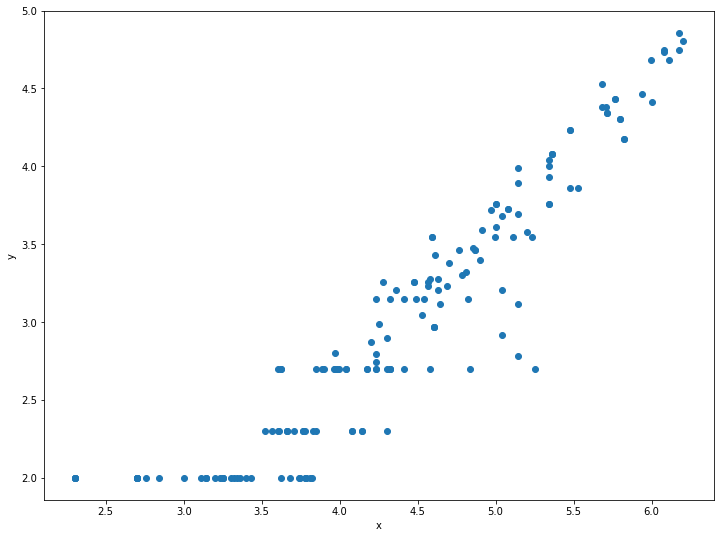

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(xt, yt)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

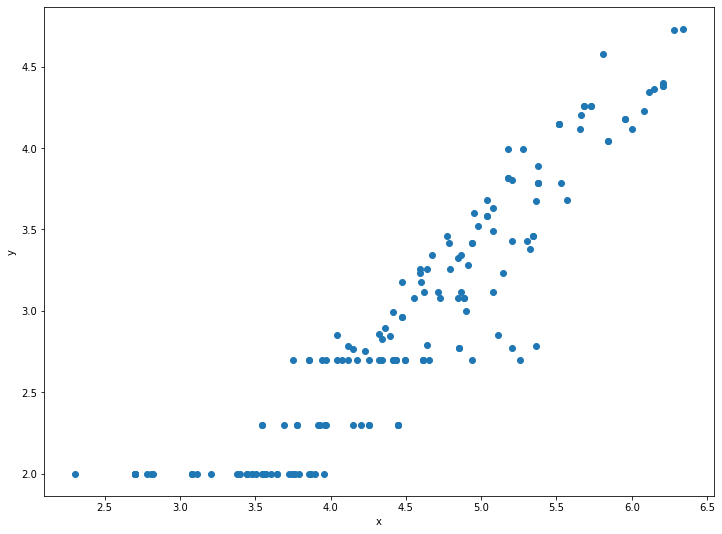

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(xt2, yt2)
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
X_t = np.array(x).reshape(-1,1)
y_t = np.array(y).reshape(-1,1)
X_ts = np.array(xt).reshape(-1,1)
y_ts = np.array(yt).reshape(-1,1)
X_ts2 = np.array(xt).reshape(-1,1)
y_ts2 = np.array(yt).reshape(-1,1)

print("X_train shape = " + str(X_t.shape))
print("y_train shape = " + str(y_t.shape))
print("X_test shape = " + str(X_ts.shape))
print("y_test shape = " + str(y_ts.shape))
print("X_test2 shape = " + str(X_ts2.shape))
print("y_test2 shape = " + str(y_ts2.shape))

X_train shape = (169, 1)
y_train shape = (169, 1)
X_test shape = (169, 1)
y_test shape = (169, 1)
X_test2 shape = (169, 1)
y_test2 shape = (169, 1)


## **ฝึกโมเดล**

In [ ]:
# Train the data
lr = LinearRegression().fit(X_t, y_t)
print("LR coefficient is", lr.coef_)
print("LR intercept is", lr.intercept_)

LR coefficient is [[0.7897985]]
LR intercept is [-0.26661766]


***ทดสอบความแม่นยำของโมเดล ทดสอบกับข้อมูล Test***

In [ ]:
# Evaluate model's accuracy on train and test set
print("Train set accuracy = " + str(lr.score(X_t, y_t)))
print("Test set accuracy  = " + str(lr.score(X_ts, y_ts)))
print("Test set accuracy2 = " + str(lr.score(X_ts2, y_ts2)))

Train set accuracy = 0.8671237326412321
Test set accuracy  = 0.8233203380518173
Test set accuracy2 = 0.8233203380518173


## ***กราฟโมเดลของเรา เมื่อเทียบกับข้อมูลจริง***

Text(0, 0.5, 'y')

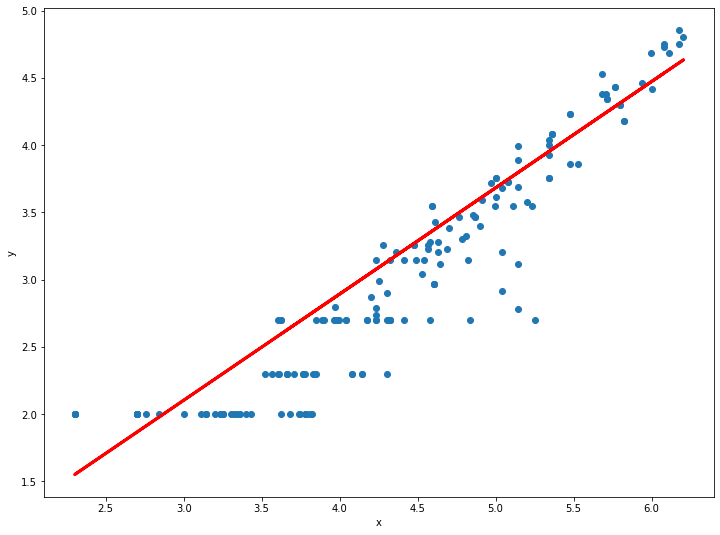

In [ ]:
y_pred = lr.predict(X_ts)

plt.figure(figsize=(12,9))
plt.scatter(X_ts, y_ts)
plt.plot(X_ts, y_pred, color="red", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")



---



---



# **สรุปทั้งหมด**

### **การเสียชีวิต**

**-Africa เป็นทวีบที่คนเสียชีวิตจาก HIV มากที่สุด ลองลงมาคือ western pacificn Americas ,South-East-Asia ,Europe ตามลำดับ**

**-ประเทศส่วนใหญ่มีอัตราการเสียชีวิตลดลง \
-บางประเทศมีอัตราการเสียชีวิตเพิ่มขึ้นถึงปี2010 และเริ่มลดลง \
 -แต่ประเทศ  Kenya,Uganda,Ethiopia,Thailand,United Republic of Tanzania ไม่อยู่ในรายชื่อประเทศที่มีอัตราการติดเชื้อที่สูงแต่มีผู้เสียชีวิตที่สูง**



---



**กราฟแสดงแนวโน้มในประเทศที่มีผู้เสียชีวิตจากเชื้อ HIV ที่สูง\
 -พบว่าอัตรราการเสียชีวิตลดลง \
 -แต่ในกรณีของบางประเทศมีการเสียชีวิตเพิ่มขึ้นถึงปี 2010 ต่อมาอัตรากำลังลดลง**




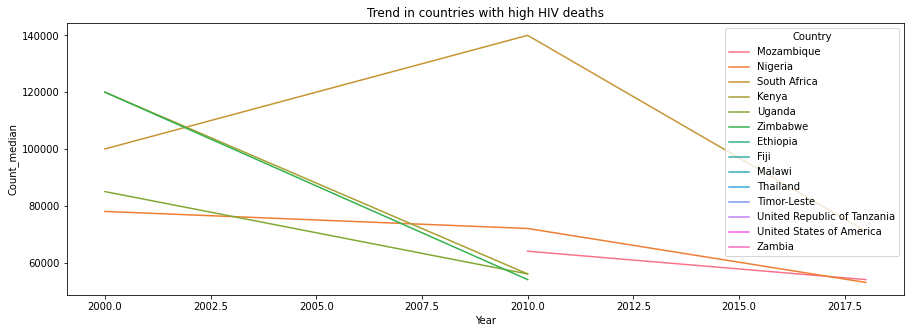

In [ ]:
highestdeaths =country_death[country_death["Count_median"]>=50000]
fig=plt.figure(figsize=(15,5))

sns.lineplot(data=highestdeaths,x="Year",y="Count_median",hue="Country").set_title("Trend in countries with high HIV deaths");
fig.show()



---



**อัตราการเสียชีวิตของผู้ป่วย HIVลดลงในแต่ละปีตั้งแต่ปี 2000**

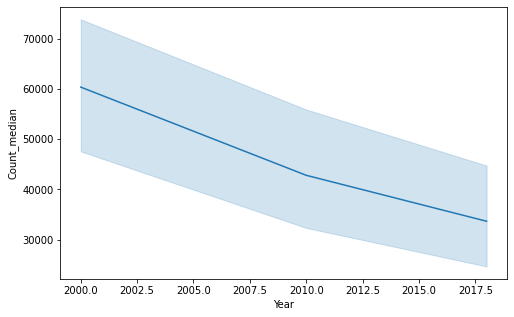

In [ ]:
rcParams["figure.figsize"] = 8,5
sns.lineplot(x="Year",y="Count_median",data=country_sort[:50])



---



**แผนที่แสงจำนวนผู้เสียชีวิตในแต่ละประเทศ**

In [ ]:
plot_map(country_death, 'Count_median', 'matter')

### **ผู้ป่วย HIV**

**ผู้ป่วย HIV มีแนวโน้มเพิ่มขึ้นในทุกภูมิภาค ยกเว้นอเมริกา ซึ่งเพิ่มขึ้นจนถึงปี 2010 และลดลงในภายหลัง ทวีปที่ผู้ป่วย สูงสุด:Africa น้อยที่สุด: Eastern Mediterranean**

In [ ]:
plot_map(living, 'Count_median', 'matter')

### **ผู้ที่ได้รับการรักษาแบบ ART**

**จำนวนผู้ที่ได้รับการรักษาแบบ ART ในแต่ละทวีป**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



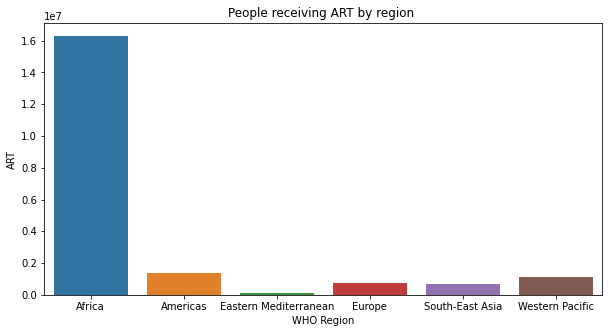

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.barplot(coveragebyregion.index,coveragebyregion).set_title("People receiving ART by region ");
fig.show()



---



อัตราผู้ป่วย HIV ในแต่ละทวีปที่ได้รับ ART คิดเป็นเปอร์เซ็น มากที่สุด : Europe
และ Western Pacific น้อยสุด: Eastern Mediterranean

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



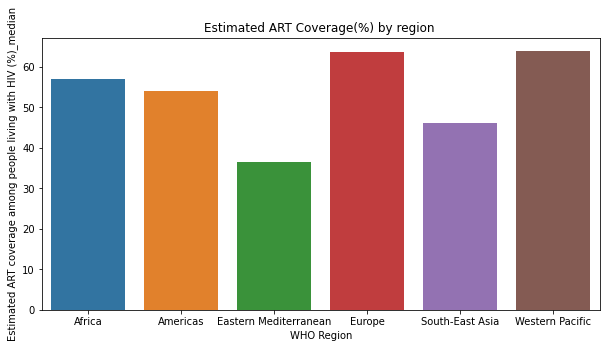

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.barplot(coveragebyregion1.index,coveragebyregion1).set_title("Estimated ART Coverage(%) by region ");
fig.show()

## **ความต้องการการรักษาแบบ ART**

ผู้ที่ต้องการรับยาต้านไวรัส recART แบ่งตามภูมิภาค

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



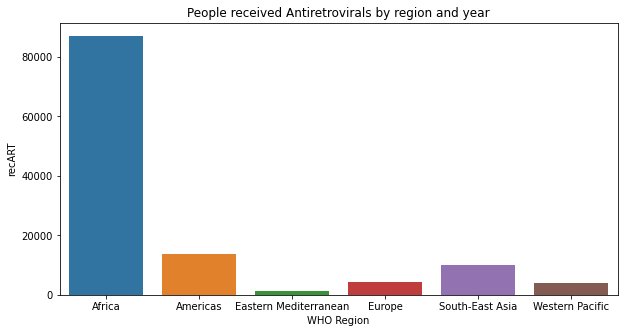

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.barplot(preventionbyregion.index,preventionbyregion["recART"]).set_title("People received Antiretrovirals by region and year");
fig.show()

## **ทวีป Africa มีจำนวนผู้ติดเชื้อ ผู้เสียชีวิตมากที่สุด**

**ประเทศที่มีแนวโน้มผู้ป่วยเพิ่มขึ้น : Eswatini,Lesotho,South Africa**

---



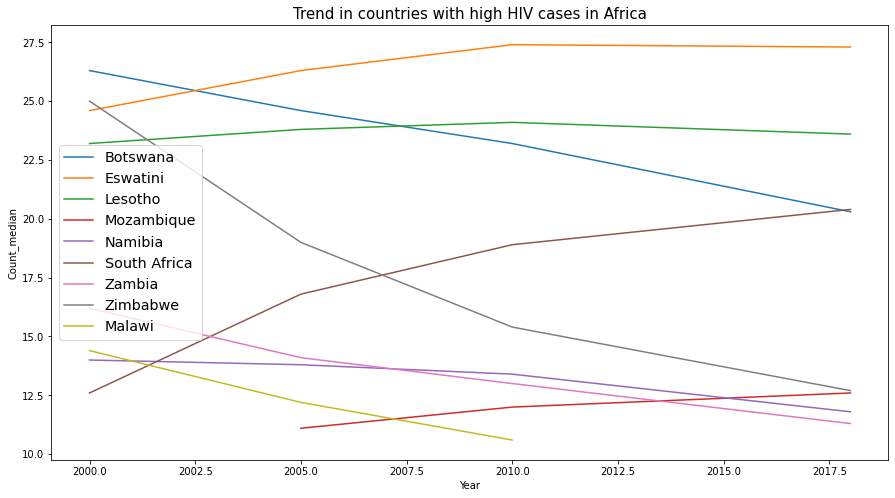

In [ ]:
Africatop = Africa[Africa["Count_median"]>=10]
fig = plt.figure(figsize=(15,8))

ax1=sns.lineplot(data=Africatop,x="Year",y="Count_median",hue="Country").set_title("Trend in countries with high HIV cases in Africa",fontsize="15");
plt.legend(fontsize="x-large");

**ตารางจำนวนผู้ที่ได้รับการรักษาแบบ ART
ประเทศ South Africa ได้รับการรักษาเยอะสุด แต่คิดเป็นเปอร์เซนแค่ 62 % กับจำนวนผู้ติดเชื้อ**

In [ ]:
AfricaART.nlargest(10, "ART")

,Country,Reported number of people receiving ART,Estimated ART coverage among people living with HIV (%)_median,WHO Region,ART
140,South Africa,4788000,62.0,Africa,4788000.0
106,Mozambique,1213000,56.0,Africa,1213000.0
169,Zimbabwe,1151000,88.0,Africa,1151000.0
161,United Republic of Tanzania,1109000,71.0,Africa,1109000.0
83,Kenya,1068000,68.0,Africa,1068000.0
114,Nigeria,1016000,53.0,Africa,1016000.0
157,Uganda,1004000,72.0,Africa,1004000.0
168,Zambia,965000,78.0,Africa,965000.0
95,Malawi,814000,78.0,Africa,814000.0
55,Ethiopia,450000,65.0,Africa,450000.0




---



**ประเทศ Angola ต้องการการรักษาแบบ ART มากที่สุด แต่กับได้น้อยคิดเป็นเพียง 38%**

In [ ]:
Africaprev.nlargest(10,"recART")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
3,Angola,9600,25000.0,38.0,Africa,9600.0
54,Eswatini,8600,11000.0,79.0,Africa,8600.0
131,Rwanda,8600,8100.0,95.0,Africa,8600.0
89,Lesotho,8200,11000.0,77.0,Africa,8200.0
31,Chad,5600,10000.0,56.0,Africa,5600.0
141,South Sudan,5500,9900.0,56.0,Africa,5500.0
24,Burkina Faso,4700,4900.0,95.0,Africa,4700.0
16,Benin,4600,2600.0,95.0,Africa,4600.0
135,Sierra Leone,4400,NaN,NaN,Africa,4400.0
152,Togo,4300,5400.0,80.0,Africa,4300.0


## **ทวีป Africa มีจำนวนผู้ติดเชื้อ ผู้เสียชีวิตมากที่สุด**

**ประเทศที่มีแนวโน้มผู้ป่วยเพิ่มขึ้น : Eswatini,Lesotho,South Africa**

---



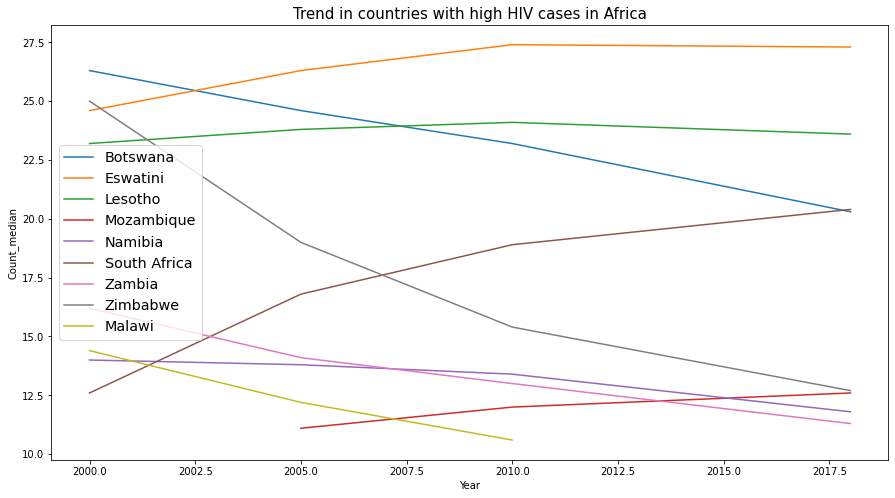

In [ ]:
Africatop = Africa[Africa["Count_median"]>=10]
fig = plt.figure(figsize=(15,8))

ax1=sns.lineplot(data=Africatop,x="Year",y="Count_median",hue="Country").set_title("Trend in countries with high HIV cases in Africa",fontsize="15");
plt.legend(fontsize="x-large");

**ตารางจำนวนผู้ที่ได้รับการรักษาแบบ ART
ประเทศ South Africa ได้รับการรักษาเยอะสุด แต่คิดเป็นเปอร์เซนแค่ 62 % กับจำนวนผู้ติดเชื้อ**

In [ ]:
AfricaART.nlargest(10, "ART")

,Country,Reported number of people receiving ART,Estimated ART coverage among people living with HIV (%)_median,WHO Region,ART
140,South Africa,4788000,62.0,Africa,4788000.0
106,Mozambique,1213000,56.0,Africa,1213000.0
169,Zimbabwe,1151000,88.0,Africa,1151000.0
161,United Republic of Tanzania,1109000,71.0,Africa,1109000.0
83,Kenya,1068000,68.0,Africa,1068000.0
114,Nigeria,1016000,53.0,Africa,1016000.0
157,Uganda,1004000,72.0,Africa,1004000.0
168,Zambia,965000,78.0,Africa,965000.0
95,Malawi,814000,78.0,Africa,814000.0
55,Ethiopia,450000,65.0,Africa,450000.0




---



**ประเทศ Angola ต้องการการรักษาแบบ ART มากที่สุด แต่กับได้น้อยคิดเป็นเพียง 38%**

In [ ]:
Africaprev.nlargest(10,"recART")

,Country,Received Antiretrovirals,Needing antiretrovirals_median,Percentage Recieved_median,WHO Region,recART
3,Angola,9600,25000.0,38.0,Africa,9600.0
54,Eswatini,8600,11000.0,79.0,Africa,8600.0
131,Rwanda,8600,8100.0,95.0,Africa,8600.0
89,Lesotho,8200,11000.0,77.0,Africa,8200.0
31,Chad,5600,10000.0,56.0,Africa,5600.0
141,South Sudan,5500,9900.0,56.0,Africa,5500.0
24,Burkina Faso,4700,4900.0,95.0,Africa,4700.0
16,Benin,4600,2600.0,95.0,Africa,4600.0
135,Sierra Leone,4400,NaN,NaN,Africa,4400.0
152,Togo,4300,5400.0,80.0,Africa,4300.0



## **การสร้างโมเดลพยากรณ์ความสัมพันธ์ของผู้ติดเชื้อกับการเสียชีวิต โดยใช้ Linear Regression**

เป็นการสร้างโมเดลจากความสัมพันธ์ของผู้ติดเชื้อและจำนวนผู้เสียชีวิต เพื่อทำนายการเสียชีวิตของผู้ติดเชื้อ HIV เทียบกับผู้ป่วย HIV

In [ ]:
lr = LinearRegression().fit(X_t, y_t)
print("LR coefficient is", lr.coef_)
print("LR intercept is", lr.intercept_)

LR coefficient is [[0.7897985]]
LR intercept is [-0.26661766]


จากการฝึกโมเดล จะได้ค่าคือ \
LR coefficient is [[0.7897985]]\
LR intercept is [-0.26661766]

**ซึ่งเมื่อเอามาใส่ใน Hypothesis function ก็จะได้สมการเส้นตรงที่เป็นโมเดลของชุดข้อมูลนี้ นั่นก็คือ:  y = 0.7897985x - 0.26661766 ***



---



**ทดสอบความแม่นยำของโมเดล**


In [ ]:
print("Train set accuracy = " + str(lr.score(X_t, y_t)))
print("Test set accuracy  = " + str(lr.score(X_ts, y_ts)))

Train set accuracy = 0.8671237326412321
Test set accuracy  = 0.8233203380518173


 **เมื่อเทียบกับตัว Train set จะอยู่ที่ 86 %\
และเมื่อเทียบกับตัว Test set จะอยู่ที่ 82%**

---



**กราฟของโมเดล**

Text(0, 0.5, 'y')

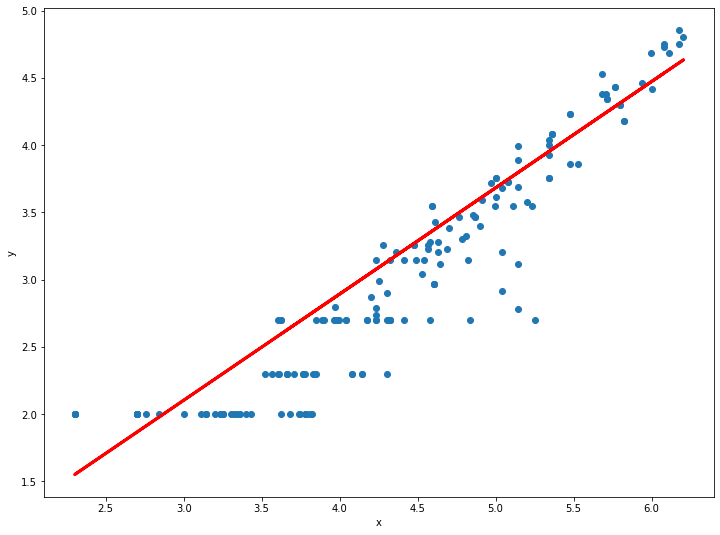

In [ ]:
y_pred = lr.predict(X_ts)

plt.figure(figsize=(12,9))
plt.scatter(X_ts, y_ts)
plt.plot(X_ts, y_pred, color="red", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")